In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import os, sys
sys.path.append('/home/hrai/codes/hpe_library')
from lib_import import *
from my_utils import BatchCamera, Camera
from my_utils import arg_as_list, get_configs
from my_utils import generate_random_segment, generate_random_trajectory, get_aligned_init_torso, get_ap_pose_2d, get_backbone_line_from_torso, get_bounded_segments_idx, get_cam_param, get_input, get_label, get_model_input, get_output, get_pairs, get_part_traj, get_pose_seq_and_cam_param, get_two_point_parts, load_h36m, load_segment_file_from_parameters, make_input, make_one_dimension_list, make_output, split_continuous_indices, MyCustomDataset, parse_args_by_model_name, get_input_gt_for_onevec, get_limb_angle, get_h36m_camera_info, h36m_data_processing
from my_utils import DH_matrix, azim_elev_to_vec, batch_azim_elev_to_vec, batch_inverse_tf, batch_projection, batch_rot_x_matrix, batch_rot_y_matrix, batch_rot_z_matrix, calculate_azimuth_elevation, calculate_rotation_quaternion, draw_arm, draw_subline, draw_torso_direction, frame_vec_to_matrix, generate_batch_tf_from_batch_origin_R, generate_camera_frame, generate_dh_frame, generate_tf_from_origin_R, generate_two_link, generate_vis_frame, generate_world_frame, get_batch_frame_vec_from_keypoints, get_batch_lower_torso_frame_from_keypoints, get_batch_lower_torso_frame_from_pose, get_batch_reference_frame, get_batch_upper_torso_frame_from_keypoints, get_batch_upper_torso_frame_from_pose, get_frame_from_keypoints, get_lower_torso_frame_from_pose, get_reference_frame, get_torso_direction, get_torso_rotation_matrix, get_torso_shape, get_upper_torso_frame_from_pose, inverse_tf, normalize_vector, project_batch_tensor, projection, rotate_torso_by_R, rotate_torso_by_R_for_batch_tensor, rotation_matrix_to_vector_align, rotation_matrix_torso2torso, Appendage, BatchAppendage, BatchDHModel, DHModel, calculate_batch_azimuth_elevation
from my_utils import args_dict_to_namespace, construct_torso_from_output, denormalize_motionbert_result, get_dataset_info_from_segment_folder, get_inference_from_dhdst, get_inference_from_dhdst_torso, get_inference_from_motionbert, get_output_type, get_result, infer_one_segment, load_best_model_for_inference, normalize_input, test_model_by_segment_file
from my_utils import get_logger, log_configs
from my_utils import init_weights, split_array_by_idxs, BaselineModel, Linear, TorsoModel
from my_utils import Camera2ImageCoordinate, MPJPE, MPJPE_for_multiple_pose, MPJPE_for_single_pose, World2CameraCoordinate, World2ImageCoordinate, _sqrt_positive_part, _weak_project, aihub2h36m, array2dict, avgErrorForOneAction, avgErrorForOneActor, avgErrorForOneCamera, camera_to_image_frame, change_bbox_convention, check_max_min, coco2h36m, convert3DResult, draw_skeleton, draw_skeleton_2d, draw_skeleton_both, euclidean_distance, fit3d2h36m, fit3d_load_gt_and_param, get3DResult, getAIHubCameraParameter, getGT, getNumFromImgName, get_batch_h36m_keypoints, get_bbox_area, get_bbox_area_from_pose2d, get_bbox_from_pose2d, get_h36m_keypoint_index, get_h36m_keypoints, get_rootrel_pose, get_video_frame, get_video_info, get_xy_centered_pose, halpe2h36m, infer_box, kookmin2h36m, kookmin2h36m_with_nose, loadAIHubCameraParameter, matrix_to_quaternion, normalize, normalize_array, optimize_scaling_factor, plot_cv2_image, readJSON, readpkl, savepkl, skew_symmetric_matrix, skew_symmetric_matrix_tensor, standardize_quaternion, mpi_inf_3dhp2h36m, get_pose_height, get_batch_bbox_from_pose2d, len_ids, part_ids, h36m_part_keypoints, get_h36m_limb_lens
from my_utils import check_duplicate_training, get_input_output_candidate, get_num_trial, load_args, load_best_model, load_dataset, load_model, prepare_training, run, run_epoch, save_args, split_array_by_idxs
from my_utils import axes_2d, axes_3d, axes_to_compare_pred_gt, draw_3d_pose, draw_bbox, draw_multiple_2d_pose, draw_multiple_3d_pose, draw_one_segment, draw_rotation_matrix, draw_segment, draw_segments, draw_trajectory, get_2d_pose_image, legend_without_duplicate_labels, plot_to_compare_pred_gt, save_h36m_pose_video, show2Dtrajectory, show3Dtrajectory, show_2d_3d, show_whole_segment_trajectories, draw_2d_pose, clear_axes
from my_utils import check_available_frame, check_continuity, draw_base_marker_3d, generate_kookmin_pkl_for_each_video, get_cam_param_kookmin, get_video_frame_kookmin, get_video_num_frame_kookmin, load_pose3d_kookmin, load_csv_kookmin, get_lbot

# 주요 디렉토리 경로
user = getpass.getuser()
alphapose_root = '/home/{}/codes/AlphaPose'.format(user)
motionbert_root = '/home/{}/codes/MotionBERT'.format(user)
kookmin_root = '/home/{}/Datasets/HAAI/국민대데이터/data'.format(user)
ap_kookmin_result_root = alphapose_root + "/examples/kookmin_result_5actions"

assert os.path.isdir(alphapose_root), "AlphaPose root directory is not exist"
assert os.path.isdir(motionbert_root), "MotionBERT root directory is not exist"
#assert os.path.isdir(kookmin_root), "Kookmin root directory is not exist"
#assert os.path.isdir(ap_kookmin_result_root), "AlphaPose Kookmin result directory is not exist"

os.chdir(motionbert_root)
from lib.utils.tools import * # get_config
from lib.utils.learning import * # load_backbone
from lib.utils.args import get_opts_args
from lib.utils.utils_data import flip_data
from lib.model.load_model import load_model
from lib.model.load_dataset import load_dataset
from lib.model.loss import *
from lib.model.training import *
from lib.model.evaluation import *
from lib.data.datareader_kookmin import DataReaderKOOKMIN
from lib.data.datareader_h36m import DataReaderH36M
from lib.data.datareader_fit3d import DataReaderFIT3D
from lib.data.datareader_random_limb import DataReaderRandomLimb
from lib.data.dataset_motion_3d import MotionDataset3D
from lib.model.DHDSTformer import DHDSTformer_total, DHDSTformer_total2, DHDSTformer_total3, DHDSTformer_total4, DHDSTformer_total5, DHDSTformer_total6, DHDSTformer_total7, DHDSTformer_total8, \
    DHDSTformer_limb, DHDSTformer_torso, DHDSTformer_torso2

### Functions

In [9]:
def get_squat_test_input(target_video, ap_root = '/home/hrai/codes/AlphaPose/examples', pos_bias=[0, 0, 0], visulize=False):
    # custom ap result
    ap_result_path = os.path.join(ap_root, target_video)
    video_path = os.path.join(ap_root, target_video + '.mp4')

    # get video info and 2d pose
    W, H, video_num_frames, fps = get_video_info(video_path)
    pose_2d_list = get_ap_pose_2d(video_path, ap_result_path)
    pose_2d_list += np.array(pos_bias)
    print(f'num video frames: {video_num_frames}, image size: {W}x{H}, fps: {fps}, num 2d poses: {len(pose_2d_list)}')

    if visulize:
        # Check 2D pose
        frame_num = 0
        frame_img = get_video_frame(video_path, frame_num)
        cx, cy, w, h = change_bbox_convention(get_bbox_from_pose2d(pose_2d_list[frame_num]), input_type='xyxy', output_type='xywh')
        fig = plt.figure(0, figsize=(4,2))
        fig.clear()
        ax = axes_2d(fig, W=W, H=H, show_axis=False)
        img = get_2d_pose_image(pose_2d_list[frame_num], img=frame_img, W=W, H=H)
        ax.imshow(img)
        ax.plot(cx, cy, 'ro')
        plt.show()

    return pose_2d_list, W, H

def inference(args, model_pos, target_model, target_video, pose_2d_list, W, H, start_frame=0, clip_len=243, input_type='video', canonical_input=False, visualize_input=False):
    args.flip = False
    
    # preprocess input
    if input_type == 'video':
        assert start_frame + clip_len <= len(pose_2d_list), "start_frame + 243 should be less than the size of pose_2d_list"
        input_data = pose_2d_list[start_frame:start_frame+clip_len].copy() # 243 frames # [243, 17, 3]
    elif input_type == 'frame':
        input_data = np.repeat(pose_2d_list[start_frame].copy().reshape(-1, 17, 3), repeats=clip_len, axis=0) # 1 frame
    input_data = normalize_input(input_data, W, H) # normalize
    input_data = torch.Tensor(input_data).unsqueeze(0) # to batch tensor
    if 'canonical' in target_model or canonical_input:
        input_data_canonical = input_data.detach().clone()
        input_data_canonical = input_data_canonical - input_data_canonical[:, :, 0:1, :]
    if visualize_input:
        fig = plt.figure(1, figsize=(2,2))
        fig.clear()
        ax = axes_2d(fig, normalize=True, show_axis=False)
        draw_2d_pose(ax, input_data[0, 0].detach().cpu().numpy(), normalize=True)
        if 'canonical' in target_model or canonical_input:
            draw_2d_pose(ax, input_data_canonical[0, 0].detach().cpu().numpy(), normalize=True)
        plt.show()
        
    # inference
    if 'canonical' in target_model or canonical_input:
        input_data = input_data_canonical
    if 'DHDST' in target_model: output = get_inference_from_dhdst(model_pos, input_data, args, W, H)[0]
    elif 'MB' in target_model:  output = get_inference_from_motionbert(model_pos, input_data, args, W, H)[0]

    # generate video name
    if canonical_input: video_name = '_'.join([opts.evaluate.split('/')[2], target_video, input_type, 'with_canonical_input']) + '.mp4'
    else: video_name = '_'.join([opts.evaluate.split('/')[2], target_video, input_type]) + '.mp4'
    print(f'video_name: {video_name}')

    return output, input_data, video_name

def save_mb_output_video(output, input_data, target_video, video_name, 
                         xlim=(-0.5, 0.5), ylim=(-0.5, 0.5), zlim=(0, 1), view=(0, 0), grid=True, imgs=None, fps=30,
                         gt=None, cam_space=True, on_ground=True, refine_tilt=False, dynamic_view=True, pose_type='2d3d'):
    # save output video
    video_folder = os.path.join('output_videos', target_video)
    if not os.path.isdir(video_folder):
        os.makedirs(video_folder)
    video_path = os.path.join(video_folder, video_name)
    print(video_path)
    save_h36m_pose_video(output, 
                         video_path, 
                         pose_2d_list=input_data.cpu().detach().numpy()[0], 
                         gt=gt,
                         xlim=xlim, ylim=ylim, zlim=zlim, grid=grid, imgs=imgs, fps=fps, view=view,
                         cam_space=cam_space, on_ground=on_ground, refine_tilt=refine_tilt, dynamic_view=dynamic_view, 
                         pose_type=pose_type)
    
def procrustes_align(predicted, target):
    """
    Pose error: MPJPE after rigid alignment (scale, rotation, and translation),
    often referred to as "Protocol #2" in many papers.
    predicted: (T, 17, 3)
    target: (T, 17, 3)
    """
    assert predicted.shape == target.shape
    
    # Translation
    muX = np.mean(target, axis=1, keepdims=True)
    muY = np.mean(predicted, axis=1, keepdims=True)
    
    X0 = target - muX
    Y0 = predicted - muY

    # Uniform scaling
    normX = np.sqrt(np.sum(X0**2, axis=(1, 2), keepdims=True))
    normY = np.sqrt(np.sum(Y0**2, axis=(1, 2), keepdims=True))
    
    X0 /= normX
    Y0 /= normY

    # Rotation
    H = np.matmul(X0.transpose(0, 2, 1), Y0)
    U, s, Vt = np.linalg.svd(H)
    V = Vt.transpose(0, 2, 1)
    R = np.matmul(V, U.transpose(0, 2, 1))

    # Avoid improper rotations (reflections), i.e. rotations with det(R) = -1
    sign_detR = np.sign(np.expand_dims(np.linalg.det(R), axis=1))
    V[:, :, -1] *= sign_detR
    s[:, -1] *= sign_detR.flatten()
    R = np.matmul(V, U.transpose(0, 2, 1)) # Rotation
    tr = np.expand_dims(np.sum(s, axis=1, keepdims=True), axis=2)
    a = tr * normX / normY # Scale
    t = muX - a*np.matmul(muY, R) # Translation
    
    # Perform rigid transformation on the input
    predicted_aligned = a*np.matmul(predicted, R) + t
    
    # Return MPJPE
    return predicted_aligned

### Load args and Model Loading

In [2]:
config_root = 'configs/pose3d/'
checkpoint_root = 'checkpoint/pose3d/'

# config = 'MB_train_h36m_gt_cam_no_factor_test_fit3d_gt_cam_no_factor.yaml'
# checkpoint = 'MB_train_h36m_gt_cam_no_factor'

# config = 'MB_train_h36m_gt_cam_no_factor_with_canonical2_test_fit3d_gt_cam_no_factor.yaml'
# checkpoint = 'MB_train_h36m_gt_cam_no_factor_with_canonical2'

# config = 'MB_train_h36m_gt_cam_no_factor.yaml'
# checkpoint = 'MB_train_h36m_gt_cam_no_factor'

# config = 'MB_train_h36m_gt_cam_no_factor_with_canonical2.yaml'
# checkpoint = 'MB_train_h36m_gt_cam_no_factor_with_canonical2'

# config = 'MB_train_h36m_gt_cam_no_factor_canonical_tr_s1_ts_s5678.yaml'
# checkpoint = 'MB_train_h36m_gt_cam_no_factor_canonical_tr_s1_ts_s5678'

config = 'MB_train_h36m.yaml'
checkpoint = 'MB_train_h36m'

config = 'MB_train_h36m_with_canonical2.yaml'
checkpoint = 'MB_train_h36m_with_canonical2'

config = 'MB_train_h36m_gt_cam_no_factor_tr_s1_ts_s5678.yaml'
checkpoint = 'MB_train_h36m_gt_cam_no_factor_tr_s1_ts_s5678'

config = 'MB_train_h36m_gt_cam_no_factor_with_canonical2_tr_s1_ts_s5678.yaml'
checkpoint = 'MB_train_h36m_gt_cam_no_factor_with_canonical2_tr_s1_ts_s5678'

input_args = ['--config', config_root+config, '--evaluate', checkpoint_root+checkpoint+'/best_epoch.bin']
args, opts = get_opts_args(input_args)

configs/pose3d/MB_train_h36m_gt_cam_no_factor_with_canonical2_tr_s1_ts_s5678.yaml
True


In [3]:
model_pos, chk_filename, checkpoint = load_model(opts, args)

MB_train_h36m_gt_cam_no_factor_with_canonical2_tr_s1_ts_s5678
Loading checkpoint checkpoint/pose3d/MB_train_h36m_gt_cam_no_factor_with_canonical2_tr_s1_ts_s5678/best_epoch.bin


In [4]:
args.subset_list = ['H36M-GT-CAM_NO_FACTOR-TR_S1_TS_S5678']
args.dt_file = 'h36m_gt_no_factor_tr_s1_ts_s5678.pkl'

args.subset_list = ['FIT3D-GT-ALL_TEST']
args.dt_file = 'fit3d_gt_all_test.pkl'


args.subset_list = ['FIT3D-GT-CAM_NO_FACTOR-ALL_TEST']
args.dt_file = 'fit3d_gt_all_test.pkl'

In [5]:
args.gt_mode, args.subset_list, args.dt_file

('cam_3d', ['FIT3D-GT-CAM_NO_FACTOR-ALL_TEST'], 'fit3d_gt_all_test.pkl')

In [6]:
train_loader_3d, test_loader, posetrack_loader_2d, instav_loader_2d, datareader = load_dataset(args)

Loading dataset...
FIT3D-GT-CAM_NO_FACTOR-ALL_TEST
FIT3D


In [7]:
args.dt_file, args.model, args.gt_mode, args.canonical

('fit3d_gt_all_test.pkl',
 'MB_train_h36m_gt_cam_no_factor_with_canonical2_tr_s1_ts_s5678',
 'cam_3d',
 True)

In [8]:
e1, e2, results_all, inputs_all, gts_all, total_result_dict = evaluate(args, model_pos, test_loader, datareader, checkpoint, only_one_batch=False)

INFO: Testing
Evalute model on epoch 59 (epoch starts from 1)


100%|██████████| 411/411 [02:29<00:00,  2.74it/s]


No eval_keypoint. Use part list
Part: whole
+------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-----------------------+------------------------+-----------------------+---------------------+----------------------------------+------------------------+--------------------+--------------------+--------------------+---------------------------------+--------------------+-----------------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-----------------

In [14]:
num_test_frames, action_clips, factor_clips, source_clips, frame_clips, gt_clips, actions = get_clip_info(datareader, results_all)

In [10]:
def visualize_input_output(input_2d, output_3d, gt_3d, fig_num=0, W=1000, H=1000, normalize=True):
    fig = plt.figure(fig_num)
    fig.clear()
    ax_2d = axes_2d(fig, loc=121, W=W, H=H, normalize=normalize)
    draw_2d_pose(ax_2d, input_2d, normalize=normalize)
    ax_3d = axes_3d(fig, loc=122)
    draw_3d_pose(ax_3d, output_3d)
    draw_3d_pose(ax_3d, gt_3d, color='r')
    plt.show()

In [15]:
results_all[batch_num][frame_num], gts_all[batch_num][frame_num], inputs_all[batch_num][frame_num]

(array([[1769.7587  , 1769.7587  ,    0.      ],
        [1887.1423  , 1798.0521  ,  -44.34414 ],
        [2030.5833  , 1834.9177  ,  296.18427 ],
        [2135.6038  , 1798.9359  ,  564.99835 ],
        [1647.0243  , 1758.2283  ,   28.112015],
        [1839.1921  , 1783.3752  ,  341.88602 ],
        [1981.286   , 1793.0962  ,  506.95462 ],
        [1661.3428  , 1799.1545  , -212.40973 ],
        [1567.3768  , 1784.6915  , -420.76654 ],
        [1506.7544  , 1847.3585  , -534.7896  ],
        [1462.2313  , 1747.6765  , -564.0173  ],
        [1745.2257  , 1814.0603  , -432.15466 ],
        [1793.0127  , 2148.6833  , -446.92154 ],
        [1802.8687  , 2432.7676  , -489.90408 ],
        [1388.946   , 1777.9268  , -342.02975 ],
        [1270.459   , 2055.718   , -357.96484 ],
        [1207.9633  , 2291.926   , -457.93753 ]], dtype=float32),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.07405877,  0.01317835, -0.02224625],
        [ 0.14157736,  0.05188048,  0.22830874],
   

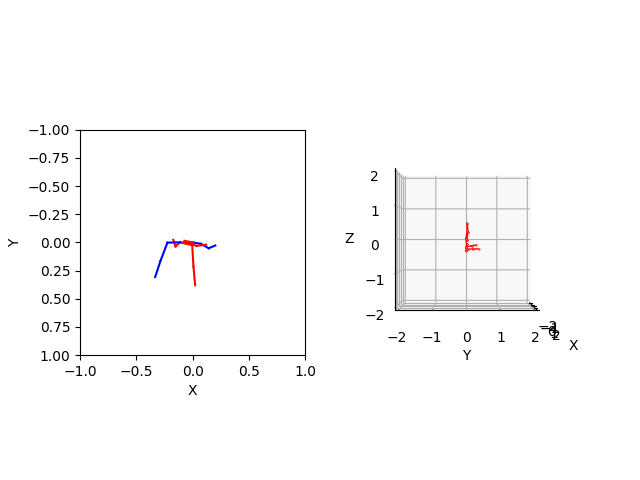

In [11]:
batch_num = 250
frame_num = 100
visualize_input_output(inputs_all[batch_num][frame_num], results_all[batch_num][frame_num], gts_all[batch_num][frame_num])

In [3]:
target_model = 'MB_release'
target_model = 'MB_train_h36m'
target_model = 'MB_train_h36m_s1'
target_model = 'MB_train_h36m_s1_with_canonical2'
target_model = 'MB_ft_h36m'
target_model = 'MB_train_h36m_with_canonical2'
target_model = 'MB_train_h36m_gt_world_no_factor'
target_model = 'MB_train_h36m_gt_cam_no_factor'
# target_model = 'MB_ft_h36m_dh_angle1'
# target_model = 'MB_ft_h36m_dh_angle1_with_canonical'
# target_model = 'MB_ft_h36m_dh_angle10_lv10_lg10_with_canonical'
# target_model = 'MB_ft_h36m_dh_angle10_lv10000_lg10'
# target_model = 'MB_ft_h36m_with_additional_finetuning'
# target_model = 'FT_MB_release_MB_ft_h36m'
# target_model = 'MB_ft_h36m_with_canonical2'
# target_model = 'MB_train_h36m_with_canonical2'
# target_model = 'DHDST2_kookmin_baseline'
# target_model = 'DHDST2_h36m_baseline'
# target_model = 'DHDST_limb_h36m_baseline'
# target_model = 'DHDST_torso_h36m_baseline'
# target_model = 'DHDST_torso2_h36m_baseline'
# target_model = 'DHDST_torso_h36m_lower1_upper1'
# target_model = 'MB_limb_train_h36m_random_limb_baseline'
# target_model = 'DHDST6_ft_h36m_gt_cam_no_factor_baseline'
# target_model = 'DHDST2_ft_h36m_gt_cam_no_factor_baseline'
# target_model = 'DHDST8_ft_h36m_gt_cam_no_factor_baseline'

# lower_upper_loss = False
# lambda_lower = 0
# lambda_upper = 0
# if lower_upper_loss:
#     if lambda_lower == 0.0:
#         target = 'DHDST_torso_h36m_upper{}'.format(lambda_upper)
#     elif lambda_upper == 0.0:
#         target = 'DHDST_torso_h36m_lower{}'.format(lambda_lower)
#     else:
#         target = 'DHDST_torso_h36m_lower{}_upper{}'.format(lambda_lower, lambda_upper)
# else:
#     target = 'DHDST_torso_h36m_baseline'

opts = parse_args_by_model_name(target=target_model)
args = get_config(opts.config)
args = check_args(args, opts)
print(args)

print(opts.evaluate, args.model)

if 'DHDSTformer_total2' == args.model: model_pos = DHDSTformer_total2(chk_filename='', args=args)
elif 'DHDSTformer_total6' == args.model: model_pos = DHDSTformer_total6(chk_filename='', args=args)
elif 'DHDSTformer_total7' == args.model: model_pos = DHDSTformer_total7(chk_filename='', args=args)
elif 'DHDSTformer_total8' == args.model: model_pos = DHDSTformer_total8(chk_filename='', args=args)
elif 'DHDSTformer_torso' == args.model: model_pos = DHDSTformer_torso(chk_filename='', args=args)
elif 'DHDSTformer_torso2' == args.model: model_pos = DHDSTformer_torso2(chk_filename='', args=args)
elif 'DHDSTformer_limb' == args.model: model_pos = DHDSTformer_limb(chk_filename='', args=args)
elif 'MB' in opts.evaluate: model_pos = load_backbone(args)
    
model_pos = nn.DataParallel(model_pos)
model_pos = model_pos.cuda()
checkpoint = torch.load(opts.evaluate, map_location=lambda storage, loc: storage)
model_pos.load_state_dict(checkpoint['model_pos'], strict=True)
model_pos = model_pos.eval()

{'train_2d': False, 'no_eval': False, 'finetune': False, 'partial_train': None, 'test_run': False, 'epochs': 60, 'checkpoint_frequency': 30, 'batch_size': 16, 'dropout': 0.0, 'learning_rate': 0.0002, 'weight_decay': 0.01, 'lr_decay': 0.99, 'part_list': ['whole'], 'denormalize_output': False, 'model': 'MB_train_h36m_gt_cam_no_factor', 'maxlen': 243, 'dim_feat': 512, 'mlp_ratio': 2, 'depth': 5, 'dim_rep': 512, 'num_heads': 8, 'att_fuse': True, 'data_root': 'data/motion3d/MB3D_f243s81/', 'subset_list': ['H36M-GT-CAM_NO_FACTOR'], 'dt_file': 'h36m_gt_no_factor.pkl', 'clip_len': 243, 'data_stride': 81, 'rootrel': True, 'sample_stride': 1, 'num_joints': 17, 'no_conf': False, 'gt_2d': False, 'gt_mode': 'cam_3d', 'lambda_3d_pos': 1.0, 'lambda_3d_velocity': 20.0, 'lambda_scale': 0.5, 'lambda_lv': 0.0, 'lambda_lg': 0.0, 'lambda_a': 0.0, 'lambda_av': 0.0, 'synthetic': False, 'flip': True, 'mask_ratio': 0.0, 'mask_T_ratio': 0.0, 'noise': False, 'name': 'MB_train_h36m_gt_cam_no_factor', 'eval_part':

### Data Loading (squat_test, squat_test_front)

num video frames: 250, image size: 1920x1080, fps: 30.00708167127442, num 2d poses: 250


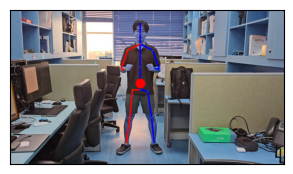

'squat_test_front'

In [21]:
pos_bias = np.array([0, 0, 0])

target_video = 'squat_test_front'
#target_video = 'squat_test'
pose_2d_list, W, H = get_squat_test_input(target_video, pos_bias=pos_bias, visulize=True)

if pos_bias.sum() != 0:
    target_video += f'_pos_bias_x{pos_bias[0]}_y{pos_bias[1]}'
target_video

### Inference

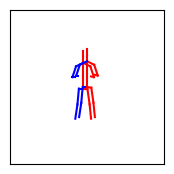

video_name: MB_ft_h36m_dh_angle10_lv10_lg10_with_canonical_squat_test_front_video.mp4
output_videos/squat_test_front/MB_ft_h36m_dh_angle10_lv10_lg10_with_canonical_squat_test_front_video.mp4


100%|██████████| 243/243 [00:07<00:00, 30.39it/s]


100%|██████████| 243/243 [00:07<00:00, 30.92it/s]


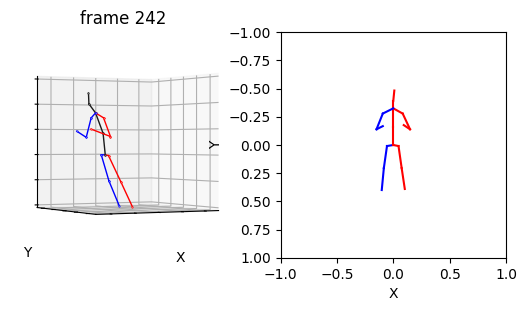

In [22]:
# inference
output, input_data, video_name = inference(args, 
                                           model_pos, 
                                           target_model, target_video,
                                           pose_2d_list, 
                                           W=W, H=H, 
                                           start_frame=0, clip_len=243, 
                                           input_type='video', 
                                           canonical_input=False, 
                                           visualize_input=True)

# save output video
save_mb_output_video(output, input_data, target_video, video_name)

In [ ]:
for target_model in ['MB_release', 'MB_train_h36m', 'MB_train_h36m_with_canonical2', 'MB_train_h36m_s1', 'MB_train_h36m_s1_with_canonical2', 'MB_ft_h36m']:
    opts = parse_args_by_model_name(target=target_model)
    args = get_config(opts.config)
    #print(opts.evaluate)

    if 'DHDST2' in opts.evaluate: model_pos = DHDSTformer2(chk_filename='', args=args)
    elif 'DHDST_torso' in opts.evaluate: model_pos = DHDSTformer_torso(chk_filename='', args=args)
    elif 'DHDSTformer_limb' in opts.evaluate: model_pos = DHDSTformer_limb(chk_filename='', args=args)
    elif 'MB' in opts.evaluate: model_pos = load_backbone(args)
        
    model_pos = nn.DataParallel(model_pos)
    model_pos = model_pos.cuda()
    checkpoint = torch.load(opts.evaluate, map_location=lambda storage, loc: storage)
    model_pos.load_state_dict(checkpoint['model_pos'], strict=True)
    model_pos = model_pos.eval()
    for pos_bias in [np.array([-500, 100, 0]), np.array([500, 100, 0]), np.array([0, 0, 0])]:  
        for target_video in ['squat_test_front', 'squat_test']:    
            pose_2d_list, W, H = get_squat_test_input(target_video, pos_bias=pos_bias, visulize=False)
            if pos_bias.sum() != 0:
                target_video += f'_pos_bias_x{pos_bias[0]}_y{pos_bias[1]}'
            #print(target_video)

            # inference
            output, input_data, video_name = inference(args, 
                                                    model_pos, 
                                                    target_model, target_video,
                                                    pose_2d_list, 
                                                    W=W, H=H, 
                                                    start_frame=0, clip_len=243, 
                                                    input_type='video', 
                                                    canonical_input=False, 
                                                    visualize_input=False)

            # save output video
            save_mb_output_video(output, input_data, target_video, video_name)

In [109]:
# # check output (1 frame)
# pose = get_rootrel_pose(output[0].copy()) # 1 frame
# #pose = get_rootrel_pose(output[0].copy()) # 1 frame
# print(pose.shape)
# R1 = Rotation.from_rotvec([-np.pi/2, 0, 0]).as_matrix() # -90 around x-axis
# R2 = Rotation.from_rotvec([0, 0, np.pi/2]).as_matrix() # 90 around z-axis
# pose = rotate_torso_by_R(pose, R2 @ R1)
# l_ankle = pose[get_h36m_keypoint_index('L_Ankle')]
# r_ankle = pose[get_h36m_keypoint_index('R_Ankle')]
# c_ankle = (l_ankle + r_ankle) / 2
# #pose -= c_ankle
# head = pose[get_h36m_keypoint_index('Head')]
# tilt = degrees(np.arctan2(head[2] - c_ankle[2], head[0] - c_ankle[0])) - 90
# R3 = Rotation.from_rotvec([0, np.radians(tilt), 0]).as_matrix() # tilt around y-axis
# #pose = rotate_torso_by_R(pose, R3)


# fig = plt.figure(5)
# fig.clear()
# ax = axes_3d(fig, xlim=(-0.5, 0.5), ylim=(-0.5, 0.5), zlim=(0, 1))
# draw_3d_pose(ax, pose)
# generate_world_frame().draw3d(scale=0.2, head_length=0.05)
# plt.show()

### Test on one video with various position

In [51]:
def get_custom_camera_info(camera):
    calibration_matrix = camera.intrinsic
    R = camera.R
    t = camera.t/1000
    H = camera.IMAGE_HEIGHT
    W = camera.IMAGE_WIDTH
    camera_param = {
        'intrinsic': calibration_matrix,
        'extrinsic': np.concatenate([R, t.reshape(3, 1)], axis=1),
    }
    fx = camera_param['intrinsic'][0, 0]  
    fy = camera_param['intrinsic'][1, 1]  
    cx = camera_param['intrinsic'][0, 2]  
    cy = camera_param['intrinsic'][1, 2] 
    return calibration_matrix, camera_param, H, W, fx, fy, cx, cy

def mpjpe(predicted, target):
    """
    Mean per-joint position error (i.e. mean Euclidean distance),
    often referred to as "Protocol #1" in many papers.
    """
    assert predicted.shape == target.shape
    return np.mean(np.linalg.norm(predicted - target, axis=len(target.shape)-1), axis=1)

In [4]:
h36m_3d_world, h36m_cam_param = load_h36m()

==> Loading 3D data wrt World CS...


In [5]:
subject = 'S5'
action = 'Waiting 1'
camera_id = '54138969'
target_video = f'{subject}_{action}_{camera_id}'

pose3d_list = h36m_3d_world._data[subject][action]['positions'].copy()
calibration_matrix, camera_param, H, W, fx, fy, cx, cy = get_h36m_camera_info(h36m_3d_world, h36m_cam_param, subject, action, camera_id)

pose_2d_list, cam_3d_list, img_3d_list, img_3d_hat_list, img_25d_list, scale_list = h36m_data_processing(pose3d_list, pose3d_list.copy(), camera_param, fx, fy, cx, cy)

In [52]:
# virtual camera 
cam_origin = np.array([0, -3, 1.5])

forward = [0, 1, 0]
left = [-1, 0, 0]
down = np.cross(left, forward)
cam_default_R = np.array([left, down, forward]) # default camera orientation

camera = Camera(origin=cam_origin, 
                calib_mat=np.array(calibration_matrix), 
                cam_default_R=cam_default_R, 
                IMAGE_HEIGHT=H, 
                IMAGE_WIDTH=W,
                cam_name='test')

subject = 'S5'
action = 'Waiting 1'
camera_id = '54138969'
target_video = f'{subject}_{action}_{camera_id}_custom_camera'

pose3d_list = h36m_3d_world._data[subject][action]['positions'].copy()
calibration_matrix, camera_param, H, W, fx, fy, cx, cy = get_custom_camera_info(camera)
pose_2d_list, cam_3d_list, img_3d_list, img_3d_hat_list, img_25d_list, scale_list = h36m_data_processing(pose3d_list, camera_param, fx, fy, cx, cy)
normalized_gt_3d = normalize_input(img_3d_list.copy(), W, H)

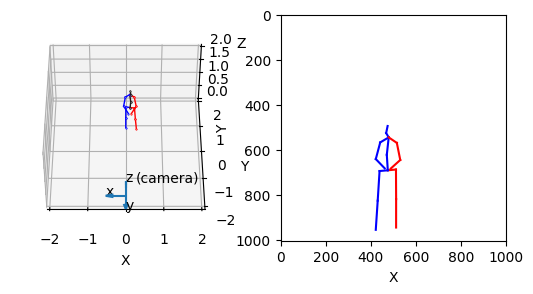

In [32]:
frame_num = 50
pose_3d = pose3d_list[frame_num]
pose_2d = pose_2d_list[frame_num]

%matplotlib inline
fig = plt.figure(6)
fig.clear()
ax = axes_3d(fig, loc=121, zlim=(0, 2), view=(45, -90))
draw_3d_pose(ax, pose_3d)
camera.cam_frame.draw3d()
ax2 = axes_2d(fig, loc=122, W=W, H=H)
draw_2d_pose(ax2, pose_2d)
plt.show()

In [128]:
for target_model in ['MB_release', 'MB_train_h36m', 'MB_train_h36m_with_canonical2', 'MB_train_h36m_s1', 'MB_train_h36m_s1_with_canonical2', 'MB_ft_h36m']:
    opts = parse_args_by_model_name(target=target_model)
    args = get_config(opts.config)
    #print(opts.evaluate)

    if 'DHDSTformer_total2' in opts.evaluate: model_pos = DHDSTformer_total2(chk_filename='', args=args)
    elif 'DHDSTformer_torso' in opts.evaluate: model_pos = DHDSTformer_torso(chk_filename='', args=args)
    elif 'DHDSTformer_limb' in opts.evaluate: model_pos = DHDSTformer_limb(chk_filename='', args=args)
    elif 'MB' in opts.evaluate: model_pos = load_backbone(args)
        
    model_pos = nn.DataParallel(model_pos)
    model_pos = model_pos.cuda()
    checkpoint = torch.load(opts.evaluate, map_location=lambda storage, loc: storage)
    model_pos.load_state_dict(checkpoint['model_pos'], strict=True)
    model_pos = model_pos.eval()

    # inference
    output, input_data, video_name = inference(args, 
                                            model_pos, 
                                            target_model, target_video,
                                            pose_2d_list, 
                                            W=W, H=H, 
                                            start_frame=0, clip_len=243, 
                                            input_type='video', 
                                            canonical_input=False, 
                                            visualize_input=False)
    
    normalized_gt_3d = get_rootrel_pose(normalized_gt_3d)
    output = get_rootrel_pose(output)

    mpjpe_error = mpjpe(normalized_gt_3d, output)
    mpjpe_error_scaled = mpjpe_error* scale_list
    print(mpjpe_error_scaled.mean()*1000)

    

    # save output video
    save_mb_output_video(output, input_data, target_video, video_name, on_ground=False, gt=normalized_gt_3d)
    
    #break

video_name: MB_release_S5_Waiting 1_54138969_custom_camera_video.mp4
182.08212940791964
output_videos/S5_Waiting 1_54138969_custom_camera/MB_release_S5_Waiting 1_54138969_custom_camera_video.mp4


100%|██████████| 243/243 [00:10<00:00, 22.65it/s]


video_name: MB_train_h36m_S5_Waiting 1_54138969_custom_camera_video.mp4
228.52633922149164
output_videos/S5_Waiting 1_54138969_custom_camera/MB_train_h36m_S5_Waiting 1_54138969_custom_camera_video.mp4


100%|██████████| 243/243 [00:10<00:00, 22.90it/s]


video_name: MB_train_h36m_with_canonical2_S5_Waiting 1_54138969_custom_camera_video.mp4
232.4084314735041
output_videos/S5_Waiting 1_54138969_custom_camera/MB_train_h36m_with_canonical2_S5_Waiting 1_54138969_custom_camera_video.mp4


100%|██████████| 243/243 [00:10<00:00, 23.08it/s]


video_name: MB_train_h36m_s1_S5_Waiting 1_54138969_custom_camera_video.mp4
910.8786202677896
output_videos/S5_Waiting 1_54138969_custom_camera/MB_train_h36m_s1_S5_Waiting 1_54138969_custom_camera_video.mp4


100%|██████████| 243/243 [00:10<00:00, 23.06it/s]


video_name: MB_train_h36m_s1_with_canonical2_S5_Waiting 1_54138969_custom_camera_video.mp4
177.0368236995741
output_videos/S5_Waiting 1_54138969_custom_camera/MB_train_h36m_s1_with_canonical2_S5_Waiting 1_54138969_custom_camera_video.mp4


100%|██████████| 243/243 [00:10<00:00, 22.47it/s]


video_name: MB_ft_h36m_S5_Waiting 1_54138969_custom_camera_video.mp4
213.51357798817125
output_videos/S5_Waiting 1_54138969_custom_camera/MB_ft_h36m_S5_Waiting 1_54138969_custom_camera_video.mp4


100%|██████████| 243/243 [00:10<00:00, 23.45it/s]


(243, 17, 3) (243, 17, 3)


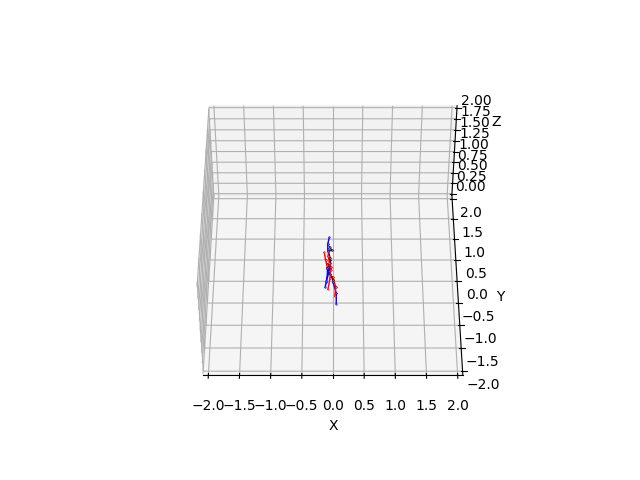

In [125]:
R1 = Rotation.from_rotvec([-np.pi/2, 0, 0]).as_matrix() # -90 around x-axis
R2 = Rotation.from_rotvec([0, 0, -np.pi/2]).as_matrix() # 90 around z-axis
R3 = Rotation.from_rotvec([0, 0, np.pi/2]).as_matrix() # 30 around y-axis
pose = rotate_torso_by_R(output, R2 @ R1)
pose2 = rotate_torso_by_R(normalized_gt_3d, R3 @ R1) 
print(pose.shape, pose2.shape)

%matplotlib widget
fig = plt.figure(7)
fig.clear()
ax = axes_3d(fig, zlim=(0, 2), view=(45, -90))
draw_3d_pose(ax, pose[0])
draw_3d_pose(ax, pose2[0])
plt.show()

### Data Loading (h36m)

In [4]:
args.subset_list, args.dt_file, args.gt_mode, args.rootrel

(['H36M-GT-CAM_NO_FACTOR'], 'h36m_gt_no_factor.pkl', 'cam_3d', True)

In [5]:
#args.dt_file = 'h36m_gt.pkl'
#args.subset_list = ['H36M-GT-WORLD_NO_FACTOR']
# datareader = DataReaderH36M(n_frames=args.clip_len, sample_stride=args.sample_stride, data_stride_train=args.data_stride, data_stride_test=args.clip_len, dt_root = 'data/motion3d', dt_file=args.dt_file, mode=args.gt_mode)

args.dt_file = 'fit3d_gt_no_factor_all_test.pkl'
args.subset_list = ['FIT3D-GT-CAM_NO_FACTOR-ALL_TEST']
datareader = DataReaderFIT3D(n_frames=args.clip_len, sample_stride=args.sample_stride, data_stride_train=args.data_stride, data_stride_test=args.clip_len, dt_root = 'data/motion3d', dt_file=args.dt_file, mode=args.gt_mode)

trainloader_params = {
          'batch_size': args.batch_size,
          'shuffle': True,
          'num_workers': 12,
          'pin_memory': True,
          'prefetch_factor': 4,
          'persistent_workers': True
    }
testloader_params = {
        'batch_size': args.batch_size,
        'shuffle': False,
        'num_workers': 12,
        'pin_memory': True,
        'prefetch_factor': 4,
        'persistent_workers': True
}
train_dataset = MotionDataset3D(args, args.subset_list, 'train')
train_loader = DataLoader(train_dataset, **trainloader_params)
test_dataset = MotionDataset3D(args, args.subset_list, 'test')
test_loader = DataLoader(test_dataset, **testloader_params)

### Evaluation

In [6]:
from train_custom import evaluate
e1, e2, results_all, total_result_dict = evaluate(args, model_pos, test_loader, datareader)

INFO: Testing


100%|██████████| 411/411 [02:28<00:00,  2.76it/s]


No eval_keypoint. Use part list
Part: whole
+------------+-------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-----------------------+------------------------+-----------------------+---------------------+----------------------------------+------------------------+--------------------+--------------------+-------------------+---------------------------------+--------------------+-----------------------------+----------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------

In [7]:
from lib.model.evaluation import *
 
e1, e2, total_result_dict = calculate_eval_metric(args, results_all, datareader)

No eval_keypoint. Use part list
Part: whole
+------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-----------------------+------------------------+-----------------------+---------------------+----------------------------------+------------------------+--------------------+--------------------+--------------------+---------------------------------+--------------------+-----------------------------+----------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------

In [11]:
num_test_frames, action_clips, factor_clips, source_clips, frame_clips, gt_clips, actions = get_clip_info(datareader, results_all)

total_result_dict = {}
pelvis, r_hip, l_hip, torso, neck, l_shoulder, r_shoulder = 0, 1, 4, 7, 8, 11, 14
r_knee, r_ankle, l_knee, l_ankle = 2, 3, 5, 6
l_elbow, l_wrist, r_elbow, r_wrist = 12, 13, 15, 16
nose, head = 9, 10
action_names = sorted(set(datareader.dt_dataset['test']['action']))
if 'H36M-SH' in args.subset_list:
    block_list = ['s_09_act_05_subact_02', 
                's_09_act_10_subact_02', 
                's_09_act_13_subact_01']
else: block_list = []

try:
    joint_list = args.eval_keypoint # Use only the specified keypoint number in config
    part = str(args.eval_keypoint)
    part_list = [part]
    args.eval_part = part
    total_result_dict[part] = {
        'e1_all': np.zeros(num_test_frames),
        'e2_all': np.zeros(num_test_frames),
        'oc': np.zeros(num_test_frames),
        'results': {},
        'results_procrustes': {}
    }

    # To classify the results by action
    for action in action_names:
        total_result_dict[part]['results'][action] = []
        total_result_dict[part]['results_procrustes'][action] = []
except:
    print('No eval_keypoint. Use part list')
    part_list = args.part_list
    for part in part_list:
        total_result_dict[part] = {
            'e1_all': np.zeros(num_test_frames),
            'e2_all': np.zeros(num_test_frames),
            'oc': np.zeros(num_test_frames),
            'results': {},
            'results_procrustes': {}
        }
        
        # To classify the results by action
        for action in action_names:
            total_result_dict[part]['results'][action] = []
            total_result_dict[part]['results_procrustes'][action] = []

No eval_keypoint. Use part list


In [12]:
for idx in range(len(results_all)):
    # check if the clip is in the block list
    if 'H36M-SH' in args.subset_list: 
        source = source_clips[idx][0][:-6]
    else: 
        source = source_clips[idx]
    if source in block_list:
        continue
    frame_list = frame_clips[idx] # range(idx*243, (idx+1)*243)
    action = action_clips[idx][0]
    factor = factor_clips[idx][:,None,None]
    gt = gt_clips[idx]
    pred = results_all[idx]
    if 'no_factor' not in args.dt_file:
        print('in')
        pred *= factor # scaling image to world scale
    
    # Root-relative Errors
    if (args.model in ['DHDSTformer_total', 'DHDSTformer_total2', 'DHDSTformer_total3', 'DHDSTformer_total4', 'DHDSTformer_total5', 'DHDSTformer_total6', 'DHDSTformer_torso', 'DHDSTformer_torso_limb', 'DHDSTformer_right_upper_arm2']) or ('MB' in args.model): # only model that predict pelvis point
        pred = pred - pred[:,0:1,:] # (243, 17, 3)
        gt = gt - gt[:,0:1,:] # (243, 17, 3)
    
    if 'DHDSTformer_torso' in args.model:
        gt = gt[:, [0, 1, 4, 7, 8, 9, 10, 11, 14], :] # (243, 9, 3) only torso point
    elif 'DHDSTformer_torso2' in args.model:
        gt = gt[:, [0, 1, 4, 8, 11, 14], :]
    elif 'DHDSTformer_right_arm' == args.model:
        gt = gt[:, [14, 15, 16], :]
    elif ('DHDSTformer_right_arm2' == args.model) or ('DHDSTformer_right_arm3' == args.model):
        gt = gt[:, [0, 14, 15, 16], :]
    
    if not args.mpjpe_after_part:
        err1_per_joint = mpjpe_for_each_joint(pred, gt) # (243, 17)
        try:
            err2_per_joint = p_mpjpe_for_each_joint(pred, gt) # (243, 17)
        except:
            #print('failed to calculate p_mpjpe')
            err2_per_joint = np.ones_like(err1_per_joint) * -1000
    
    for part in part_list:
        if part == 'whole': joint_list = [j for j in range(pred.shape[1])]
        elif part == 'torso_small': joint_list = [pelvis, r_hip, l_hip, neck, l_shoulder, r_shoulder]
        elif part == 'torso_full': joint_list = [pelvis, r_hip, l_hip, torso, neck, nose, head, l_shoulder, r_shoulder]
        elif part == 'torso_full_to_small': joint_list = [0, 1, 2, 4, 7, 8]
        elif part == 'arms': joint_list = [l_elbow, l_wrist, r_elbow, r_wrist]
        elif part == 'right_arm': joint_list = [r_shoulder, r_elbow, r_wrist]
        elif part == 'legs': joint_list = [r_knee, r_ankle, l_knee, l_ankle]
        elif part == 'pelvis': joint_list = [pelvis]
        elif part == 'r_hip': joint_list = [r_hip]
        elif part == 'l_hip': joint_list = [l_hip]
        elif part == 'torso': joint_list = [torso]
        elif part == 'neck': joint_list = [neck]
        elif part == 'l_shoulder': joint_list = [l_shoulder]
        elif part == 'r_shoulder': joint_list = [r_shoulder]
        elif part == 'l_elbow': joint_list = [l_elbow]
        elif part == 'l_wrist': joint_list = [l_wrist]
        elif part == 'r_elbow': joint_list = [r_elbow]
        elif part == 'r_wrist': joint_list = [r_wrist]
        elif part == 'r_knee' : joint_list = [r_knee]
        elif part == 'r_ankle': joint_list = [r_ankle]
        elif part == 'l_knee' : joint_list = [l_knee]
        elif part == 'l_ankle': joint_list = [l_ankle]
        elif part == 'nose'   : joint_list = [nose]
        elif part == 'head'   : joint_list = [head]
        
        if args.mpjpe_after_part:
            err1_per_joint = mpjpe_for_each_joint(pred[:, joint_list], gt[:, joint_list]) # (243, 17)
            err2_per_joint = p_mpjpe_for_each_joint(pred[:, joint_list], gt[:, joint_list]) # (243, 17)
            err1 = np.mean(err1_per_joint, axis=1)
            err2 = np.mean(err2_per_joint, axis=1)
        else:
            err1 = np.mean(err1_per_joint[:, joint_list], axis=1) # mpjpe(pred, gt) # (243, )
            err2 = np.mean(err2_per_joint[:, joint_list], axis=1) # p_mpjpe(pred, gt)
        #print(err1, err2)
        if 'no_factor' in args.dt_file:
            err1 *= 1000
            err2 *= 1000
        total_result_dict[part]['e1_all'][frame_list] += err1 # (243, ) # 각 프레임 별 에러를 더해줌
        total_result_dict[part]['e2_all'][frame_list] += err2 # (243, ) # 각 프레임 별 에러를 더해줌
        total_result_dict[part]['oc'][frame_list] += 1
    break

In [13]:
# Error per action
for idx in range(num_test_frames):
    for part in part_list:
        if total_result_dict[part]['e1_all'][idx] > 0:
            err1 = total_result_dict[part]['e1_all'][idx] / total_result_dict[part]['oc'][idx]
            err2 = total_result_dict[part]['e2_all'][idx] / total_result_dict[part]['oc'][idx]
            action = actions[idx]
            total_result_dict[part]['results'][action].append(err1)
            total_result_dict[part]['results_procrustes'][action].append(err2)

for part in part_list:
    print('Part:', part)
    final_result = []
    final_result_procrustes = []
    summary_table = prettytable.PrettyTable()
    summary_table.field_names = ['test_name'] + action_names # first row
    for action in action_names:
        final_result.append(np.mean(total_result_dict[part]['results'][action]))
        final_result_procrustes.append(np.mean(total_result_dict[part]['results_procrustes'][action]))
    summary_table.add_row(['P1 ({})'.format(part)] + final_result) # second row
    summary_table.add_row(['P2 ({})'.format(part)] + final_result_procrustes) # third row
    print(summary_table)
    
    # Total Error
    e1_part = np.mean(np.array(final_result))
    e2_part = np.mean(np.array(final_result_procrustes))
    print('Protocol #1 Error (MPJPE):', e1_part, 'mm')
    print('Protocol #2 Error (P-MPJPE):', e2_part, 'mm')
    print('----------------------------------------')
    if part == args.eval_part:
        e1 = e1_part
        e2 = e2_part

No eval_keypoint. Use part list
Part: whole
+------------+-------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+
| test_name  |     Directions    |    Directions 1    |    Discussion 1    |    Discussion 2   |       Eating      |      Eating 1      |      Greeting      |     Greeting 1     |     Greeting 2     |      Phoning      |     Phoning 1 

In [16]:
train_labels, test_labels = datareader.read_3d()

In [23]:
test_labels[-1]

array([[ 0.94724274, -0.3076998 ,  3.7543652 ],
       [ 1.0493768 , -0.29340968,  3.6623905 ],
       [ 1.129949  ,  0.0943005 ,  3.9002519 ],
       [ 1.1229903 ,  0.53013587,  4.0479164 ],
       [ 0.8451083 , -0.32198992,  3.8463402 ],
       [ 0.8639022 ,  0.13178863,  3.9307234 ],
       [ 0.7549089 ,  0.5716535 ,  3.8504407 ],
       [ 0.96738017, -0.5491999 ,  3.6770275 ],
       [ 1.0235966 , -0.79063815,  3.645075  ],
       [ 1.0835266 , -0.85276693,  3.714991  ],
       [ 1.105306  , -0.9650923 ,  3.703439  ],
       [ 0.89622045, -0.78566283,  3.7519226 ],
       [ 0.8290444 , -0.675251  ,  4.0038815 ],
       [ 1.0424112 , -0.55129236,  3.9761808 ],
       [ 1.14668   , -0.70144534,  3.57754   ],
       [ 1.2513888 , -0.44701505,  3.6445267 ],
       [ 1.2072296 , -0.51199317,  3.8800857 ]], dtype=float32)

### Check angle output

In [119]:
from lib.model.evaluation import * 

results_all = []
gts_all = []
inputs_all = []
discontinuity_lists = [[], [], []]
mpjpes_per_batch_frame = []
mpjpes_per_joint = []
mpjpes_discontinuity = []
with torch.no_grad():
    for batch_input, batch_gt in tqdm(test_loader): # batch_input: normalized joint_2d, batch_gt: normalized joint3d_image
        batch_size = len(batch_input) 
        # preprocessing
        batch_input, batch_gt, batch_gt_torso, batch_gt_limb_pos = preprocess_eval(args, batch_input, batch_gt)
        # inference
        predicted_3d_pos = model_pos.module.forward(batch_input, length_type=args.test_length_type, ref_frame=args.length_frame)
        # postprocessing
        if args.rootrel:
            predicted_3d_pos[:,:,0,:] = 0     # [N,T,17,3]
        else:
            batch_gt[:,0,0,2] = 0

        # mpjpe per frame
        batch_mpjpe_per_joint = torch.norm(predicted_3d_pos-batch_gt, dim=-1).cpu().detach().numpy()
        batch_mpjpe_each_frame = torch.norm(predicted_3d_pos-batch_gt, dim=-1).mean(axis=-1).cpu().detach().numpy() # (B, F)
        mpjpes_per_batch_frame += batch_mpjpe_each_frame.tolist()
        mpjpes_per_joint += batch_mpjpe_per_joint.tolist()

        # get dh output
        angle_output, length_output = model_pos.module.get_dh_output() # (B, F, 16), (B, 2, 4) 
        # right_arm_azim1, right_arm_elev1, right_arm_azim2, right_arm_elev2 = angle_output[:, :, 0].cpu().detach().numpy(),  angle_output[:, :, 1].cpu().detach().numpy(),  angle_output[:, :, 2].cpu().detach().numpy(), angle_output[:, :, 3].cpu().detach().numpy()
        # left_arm_azim1, left_arm_elev1, left_arm_azim2, left_arm_elev2     = angle_output[:, :, 4].cpu().detach().numpy(),  angle_output[:, :, 5].cpu().detach().numpy(),  angle_output[:, :, 6].cpu().detach().numpy(), angle_output[:, :, 7].cpu().detach().numpy()
        # right_leg_azim1, right_leg_elev1, right_leg_azim2, right_leg_elev2 = angle_output[:, :, 8].cpu().detach().numpy(),  angle_output[:, :, 9].cpu().detach().numpy(),  angle_output[:, :, 10].cpu().detach().numpy(), angle_output[:, :, 11].cpu().detach().numpy()
        # left_leg_azim1, left_leg_elev1, left_leg_azim2, left_leg_elev2     = angle_output[:, :, 12].cpu().detach().numpy(), angle_output[:, :, 13].cpu().detach().numpy(), angle_output[:, :, 14].cpu().detach().numpy(), angle_output[:, :, 15].cpu().detach().numpy()

        # get discontinuity
        angle_output_next = angle_output.clone()[:, 1:, :]
        angle_output_next = torch.cat([angle_output_next, angle_output_next[:, -1, :].unsqueeze(1)], dim=1)
        angle_output_diff = angle_output - angle_output_next    
        discontinuity_list = np.array(np.where(np.abs(angle_output_diff.cpu().detach().numpy()) > np.pi/2))
        discontinuity_lists[0] += discontinuity_list.tolist()[0]
        discontinuity_lists[1] += discontinuity_list.tolist()[1]
        discontinuity_lists[2] += discontinuity_list.tolist()[2]
        
        # get mpjpe for frames with angle discontinuity
        pred_discontinuity = predicted_3d_pos[discontinuity_list[0], discontinuity_list[1]]
        gt_discontinuity = batch_gt[discontinuity_list[0], discontinuity_list[1]]
        error_discontinuous = pred_discontinuity-gt_discontinuity # (N, 17, 3)
        mpjpe_discontinuity = torch.norm(error_discontinuous, dim=-1).mean(axis=-1).cpu().detach().numpy() # (N)
        mpjpes_discontinuity += mpjpe_discontinuity.tolist()
        #break

  0%|          | 0/133 [00:00<?, ?it/s]

100%|██████████| 133/133 [00:42<00:00,  3.12it/s]


In [83]:
np.array(mpjpes_per_batch_frame).shape

(2128, 243)

In [85]:
mpjpes_per_batch_frame = np.array(mpjpes_per_batch_frame) # (N, 243), N: number of total batch
mpjpes_per_frame = mpjpes_per_batch_frame.copy().reshape(-1) # (N*243, )
mpjpes_per_joint = np.array(mpjpes_per_joint).reshape(-1, 17) # (N*243, 17)
mpjpes_discontinuity = np.array(mpjpes_discontinuity).reshape(-1)

In [86]:
mpjpes_per_frame.shape, mpjpes_discontinuity.shape, mpjpes_per_joint.shape

((2128, 243), (1195,), (517104, 17))

In [89]:
mpjpes_per_frame.mean(), mpjpes_discontinuity.mean()

(0.02694667671228034, 0.028469647652621548)

In [96]:
h36m_keypoints ={
    0 : 'Pelvis',
    1 : 'R_Hip',
    2 : 'R_Knee',
    3 : 'R_Ankle',
    4 : 'L_Hip',
    5 : 'L_Knee',
    6 : 'L_Ankle',
    7 : 'Torso',
    8 : 'Neck',
    9 : 'Nose',
    10 : 'Head',
    11 : 'L_Shoulder',
    12 : 'L_Elbow',
    13 : 'L_Wrist',
    14 : 'R_Shoulder',
    15 : 'R_Elbow',
    16 : 'R_Wrist',
}

In [97]:
for i in range(17):
    print(h36m_keypoints[i], mpjpes_per_joint[:, i].mean())

Pelvis 0.0
R_Hip 0.016772636870667934
R_Knee 0.034644525469616626
R_Ankle 0.045827546740922924
L_Hip 0.01709888796559074
L_Knee 0.03701157272374144
L_Ankle 0.05323972260704492
Torso 0.013971284746115538
Neck 0.016144044500168164
Nose 0.018724675498788857
Head 0.022722810046511055
L_Shoulder 0.018772005013588368
L_Elbow 0.028632584248468602
L_Wrist 0.03825243844119463
R_Shoulder 0.02005132373938102
R_Elbow 0.032261080539130856
R_Wrist 0.04396636268720471


In [101]:
mpjpes_per_frame.mean()

0.02694667671228034

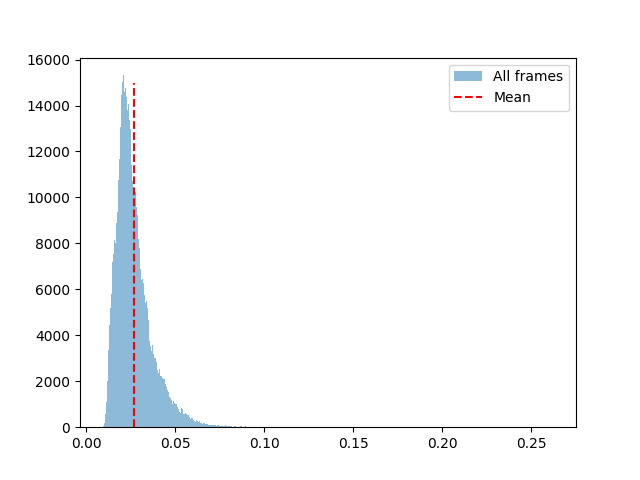

In [110]:
# mpjpe histogram
fig = plt.figure(11)
fig.clear()
ax = fig.add_subplot(111)
ax.hist(mpjpes_per_frame.copy().reshape(-1), bins=500, alpha=0.5, label='All frames')
ax.vlines(mpjpes_per_frame.mean(), 0, 15000, color='r', linestyle='--', label='Mean')
ax.legend()
plt.show()

In [118]:
mpjpes_per_frame.shape

(2128, 243)

In [117]:
np.array(np.where(mpjpes_per_frame.copy().reshape(-1) > mpjpes_per_frame.mean())[0])

array([     0,      1,      2, ..., 515466, 515467, 515468])

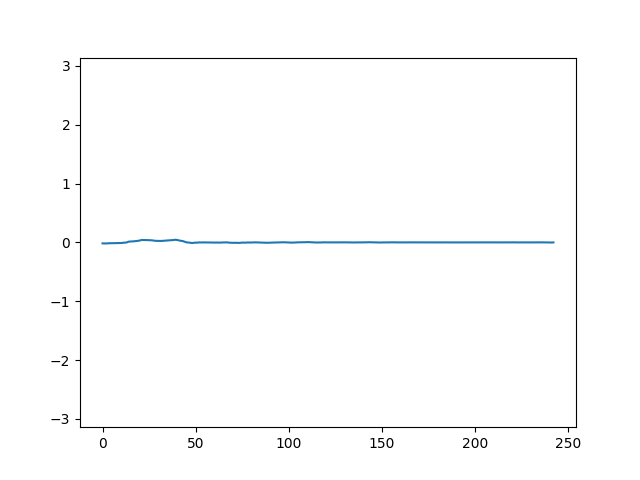

In [90]:
batch_num = 0
part_num = 0
fig = plt.figure(8)
fig.clear()
ax = fig.add_subplot(111)
ax.set_ylim(-np.pi, np.pi)

ax.plot(angle_output_diff.cpu().detach().numpy()[8, :, 2])
# ax.plot(right_arm_azim1[batch_num])
# ax.plot(right_arm_elev1[batch_num])
# ax.plot(right_arm_azim2[batch_num])
# ax.plot(right_arm_elev2[batch_num])
# for batch_num in range(16):
#     for part_num in range(16):
#         ax.plot(angle_output_diff.cpu().detach().numpy()[batch_num, : , part_num], label=f'part{part_num}')
plt.show()

In [14]:
pose_3d = predicted_3d_pos[8, 37].cpu().detach().numpy()
gt_3d = batch_gt[8, 37].cpu().detach().numpy()

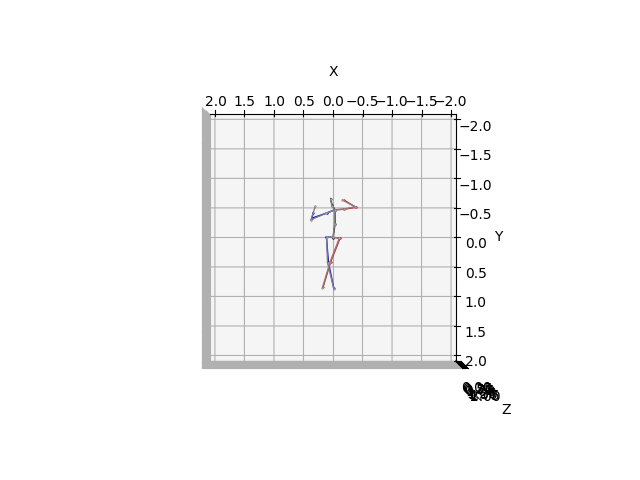

In [15]:
fig = plt.figure(9)
fig.clear()
ax = axes_3d(fig, zlim=(0, 2), view=(90, 90))
draw_3d_pose(ax, pose_3d)
draw_3d_pose(ax, gt_3d, color='0.5')
plt.show()

In [36]:
length_output.shape

torch.Size([16, 2, 4])

In [17]:
batch_gt.shape

torch.Size([16, 243, 17, 3])

In [58]:
batch_length_gt = [] 
for batch_num in range(16):
    batch_gt_length = get_h36m_limb_lens(batch_gt[batch_num])
    right_upper_arm_length = batch_gt_length[:, len_ids['R_UPPER_ARM']]
    right_lower_arm_length = batch_gt_length[:, len_ids['R_LOWER_ARM']]
    right_upper_leg_length = batch_gt_length[:, len_ids['R_UPPER_LEG']]
    right_lower_leg_length = batch_gt_length[:, len_ids['R_LOWER_LEG']]
    left_upper_arm_length  = batch_gt_length[:, len_ids['L_UPPER_ARM']]
    left_lower_arm_length  = batch_gt_length[:, len_ids['L_LOWER_ARM']]
    left_upper_leg_length  = batch_gt_length[:, len_ids['L_UPPER_LEG']]
    left_lower_leg_length  = batch_gt_length[:, len_ids['L_LOWER_LEG']]
    right_arm_length = np.stack([right_upper_arm_length, right_lower_arm_length], axis=1)
    right_leg_length = np.stack([right_upper_leg_length, right_lower_leg_length], axis=1)
    left_arm_length  = np.stack([left_upper_arm_length, left_lower_arm_length], axis=1)
    left_leg_length  = np.stack([left_upper_leg_length, left_lower_leg_length], axis=1)
    length = np.stack([right_arm_length, right_leg_length, left_arm_length, left_leg_length], axis=2)
    batch_length_gt.append(length)
batch_length_gt = np.array(batch_length_gt).mean(axis=1)

In [59]:
batch_length_gt.shape

(16, 2, 4)

In [60]:
length_output, batch_length_gt

(tensor([[[0.2909, 0.2880, 0.4449, 0.4456],
          [0.2423, 0.2237, 0.4434, 0.4416]],
 
         [[0.2876, 0.2888, 0.4505, 0.4497],
          [0.2513, 0.2268, 0.4392, 0.4401]],
 
         [[0.2855, 0.2938, 0.4481, 0.4458],
          [0.2294, 0.2431, 0.4461, 0.4488]],
 
         [[0.2903, 0.2920, 0.4662, 0.4688],
          [0.2326, 0.2455, 0.4521, 0.4533]],
 
         [[0.2817, 0.3038, 0.4518, 0.4522],
          [0.2459, 0.2447, 0.4413, 0.4440]],
 
         [[0.2905, 0.2868, 0.4543, 0.4549],
          [0.2426, 0.2514, 0.4453, 0.4472]],
 
         [[0.2831, 0.2876, 0.4541, 0.4563],
          [0.2294, 0.2487, 0.4489, 0.4500]],
 
         [[0.2963, 0.2893, 0.4497, 0.4528],
          [0.2423, 0.2472, 0.4432, 0.4455]],
 
         [[0.2643, 0.2896, 0.4562, 0.4570],
          [0.2088, 0.2406, 0.4435, 0.4511]],
 
         [[0.2934, 0.2879, 0.4660, 0.4662],
          [0.2421, 0.2476, 0.4531, 0.4536]],
 
         [[0.2926, 0.2894, 0.4594, 0.4579],
          [0.2428, 0.2444, 0.4500, 0.4472]],
 

In [1]:
length_error = np.abs(length_output.cpu().detach().numpy() - batch_length_gt)
length_error = length_error.reshape(length_error.shape[0], -1)
length_error.mean(axis=1)

NameError: name 'np' is not defined

In [ ]:
length_error

array([[-5.41579723e-03, -1.84189349e-01,  1.48581564e-01,
        -2.66256332e-02, -6.70124590e-03, -2.44941011e-01,
         1.94427237e-01, -2.70416439e-02],
       [-8.72868299e-03, -1.83418483e-01,  1.54227972e-01,
        -2.24842131e-02,  2.27384269e-03, -2.41812557e-01,
         1.90186217e-01, -2.85643637e-02],
       [-1.08368695e-02, -1.78393662e-01,  1.51812285e-01,
        -2.63479054e-02, -1.96572393e-02, -2.25485548e-01,
         1.97132275e-01, -1.97741687e-02],
       [-6.04009628e-03, -1.80144042e-01,  1.69923782e-01,
        -3.44046950e-03, -1.64134353e-02, -2.23131746e-01,
         2.03038499e-01, -1.53708160e-02],
       [-1.45772994e-02, -1.68368667e-01,  1.55498415e-01,
        -2.00074911e-02, -3.06746364e-03, -2.23968968e-01,
         1.92251697e-01, -2.45971680e-02],
       [ 7.31724501e-03, -1.75166607e-01,  1.71156645e-01,
        -7.02226162e-03, -5.69546223e-03, -2.08807319e-01,
         1.97010994e-01, -1.29805207e-02],
       [-1.12116337e-04, -1.743503

### evaluate function

In [13]:
# def postprocessing(pose):
#     #pose = get_rootrel_pose(output[0].copy()) # 1 frame
#     print(pose.shape)
#     R1 = Rotation.from_rotvec([-np.pi/2, 0, 0]).as_matrix() # -90 around x-axis
#     R2 = Rotation.from_rotvec([0, 0, np.pi/2]).as_matrix() # 90 around z-axis
#     pose = rotate_torso_by_R(pose, R2 @ R1)
#     l_ankle = pose[get_h36m_keypoint_index('L_Ankle')]
#     r_ankle = pose[get_h36m_keypoint_index('R_Ankle')]
#     c_ankle = (l_ankle + r_ankle) / 2
#     #pose -= c_ankle
#     head = pose[get_h36m_keypoint_index('Head')]
#     tilt = degrees(np.arctan2(head[2] - c_ankle[2], head[0] - c_ankle[0])) - 90
#     R3 = Rotation.from_rotvec([0, np.radians(tilt), 0]).as_matrix() # tilt around y-axis
#     #pose = rotate_torso_by_R(pose, R3)
#     return pose

In [5]:
from train_custom import evaluate
args.canonical = False
args.part_list = ['torso_small']
args.eval_part = 'torso_small'

In [7]:
e1, e2, results_all, total_result_dict = evaluate(args, model_pos, test_loader, datareader)

INFO: Testing


  0%|          | 0/140 [00:00<?, ?it/s]

100%|██████████| 140/140 [01:05<00:00,  2.13it/s]


Part: torso_small
+------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|    test_name     |     Direction      |      Discuss       |       Eating       |       Greet        |       Phone       |       Photo        |        Pose        |      Purchase      |      Sitting       |    SittingDown     |       Smoke        |        Wait        |        Walk        |      WalkDog       |      WalkTwo      |
+------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-

### Compare Procrustes alignment

0.21677281 0.014367135


/home/hrai/miniconda3/envs/motionbert/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


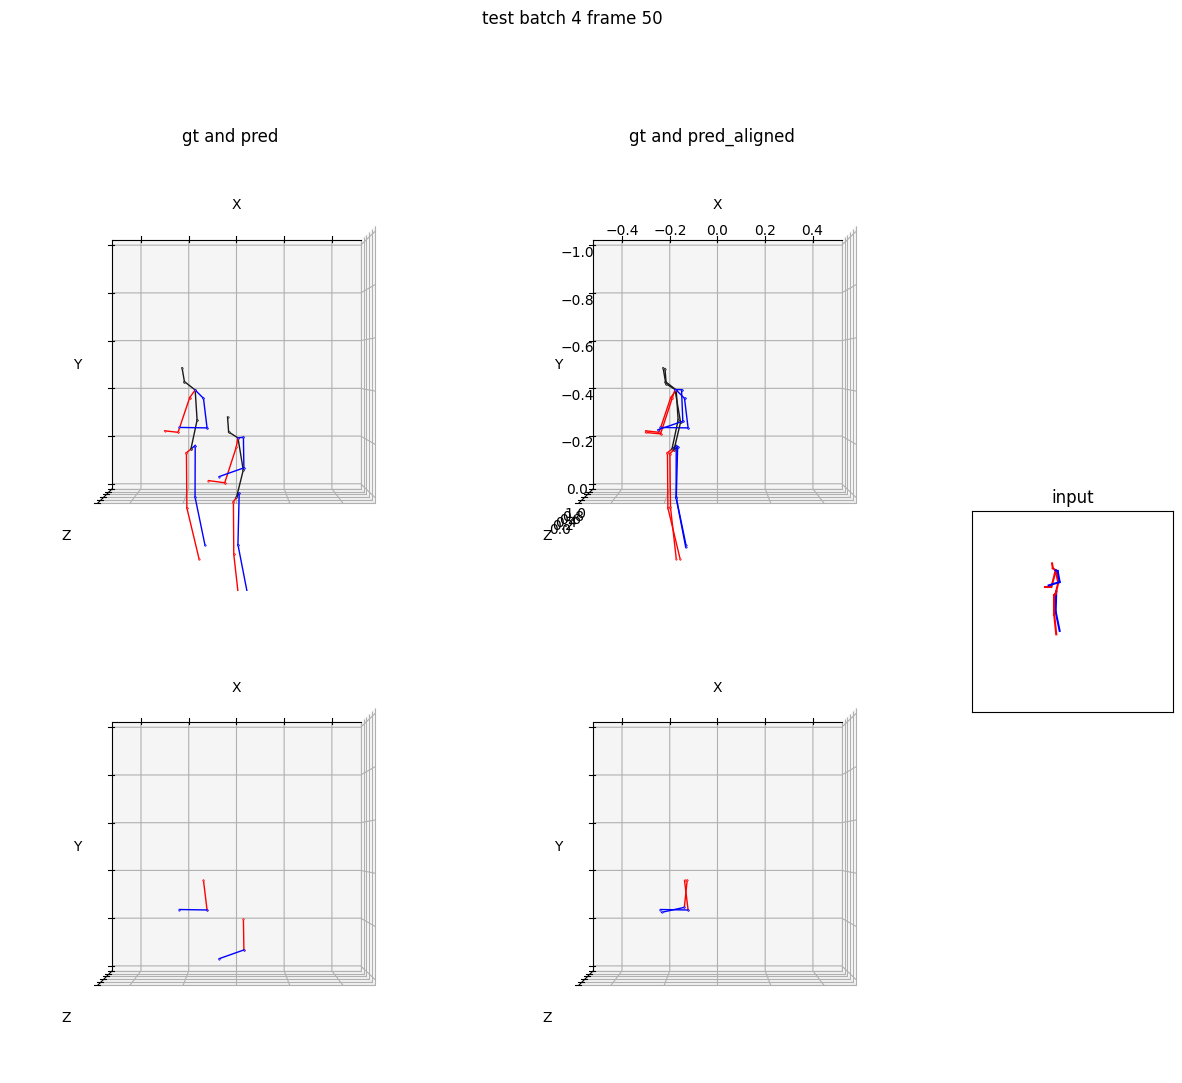

In [19]:
batch_num = 4
frame_num = 50
pred_3d_pos = results_all[batch_num].copy() # [243, 17, 3]
gt_3d_pos = gts_all[batch_num].copy() # [243, 17, 3]
input_2d = inputs_all[batch_num].copy()

part = part_ids['R_ARM']
pred_right_arm = pred_3d_pos[:, h36m_part_keypoints[part]] 
gt_right_arm = gt_3d_pos[:, h36m_part_keypoints[part]]

pred_3d_pos_aligned = procrustes_align(pred_3d_pos, gt_3d_pos)
pred_right_arm_aligned = procrustes_align(pred_right_arm, gt_right_arm)

from lib.model.loss import *
mpjpe_3d_pos = mpjpe(pred_3d_pos, gt_3d_pos)
p_mpjpe_3d_pos = p_mpjpe(pred_3d_pos, gt_3d_pos)
print(mpjpe_3d_pos.mean(), p_mpjpe_3d_pos.mean())

%matplotlib inline
fig = plt.figure(8, figsize=(15, 12), layout='constrained')
fig.clear()
axd = fig.subplot_mosaic(
    """
    AABBC
    AABBC
    DDEEC
    DDEEC
    """,
    per_subplot_kw={('A', 'B', 'D', 'E'): {'projection': '3d'}}
)
axA = axes_3d(ax=axd['A'], xlim=(-0.5, 0.5), ylim=(-1, 0), zlim=(0, 1), view=(-90,-90), show_axis=False)
axB = axes_3d(ax=axd['B'], xlim=(-0.5, 0.5), ylim=(-1, 0), zlim=(0, 1), view=(-90,-90), show_axis=True)
axC = axes_2d(ax=axd['C'], normalize=True, show_axis=False)
axD = axes_3d(ax=axd['D'], xlim=(-0.5, 0.5), ylim=(-1, 0), zlim=(0, 1), view=(-90,-90), show_axis=False)
axE = axes_3d(ax=axd['E'], xlim=(-0.5, 0.5), ylim=(-1, 0), zlim=(0, 1), view=(-90,-90), show_axis=False)

axA.set_title('gt and pred')
axB.set_title('gt and pred_aligned')
axC.set_title('input')

dataset = 'h36m'

draw_3d_pose(axA, gt_3d_pos[frame_num], dataset=dataset)
draw_3d_pose(axA, pred_3d_pos[frame_num], dataset=dataset)

draw_3d_pose(axB, gt_3d_pos[frame_num], dataset=dataset)
draw_3d_pose(axB, pred_3d_pos_aligned[frame_num], dataset=dataset)

draw_2d_pose(axC, input_2d[frame_num], normalize=True)

draw_3d_pose(axD, gt_right_arm[frame_num], dataset='limb')
draw_3d_pose(axD, pred_right_arm[frame_num], dataset='limb')

draw_3d_pose(axE, gt_right_arm[frame_num], dataset='limb')
draw_3d_pose(axE, pred_right_arm_aligned[frame_num], dataset='limb')

plt.suptitle(f'test batch {batch_num} frame {frame_num}')
plt.show()

### Length Consistency

In [7]:
batch_num = 0
pred_3d_pos = results_all[batch_num].copy()
gt_3d_pos = gts_all[batch_num].copy()

gt_length = get_h36m_limb_lens(gt_3d_pos.copy()) # (243, 16)
pred_length = get_h36m_limb_lens(pred_3d_pos.copy()) # (243, 16)

gt_ref = gt_length[:, len_ids['R_HIP']] + gt_length[:, len_ids['L_HIP']]

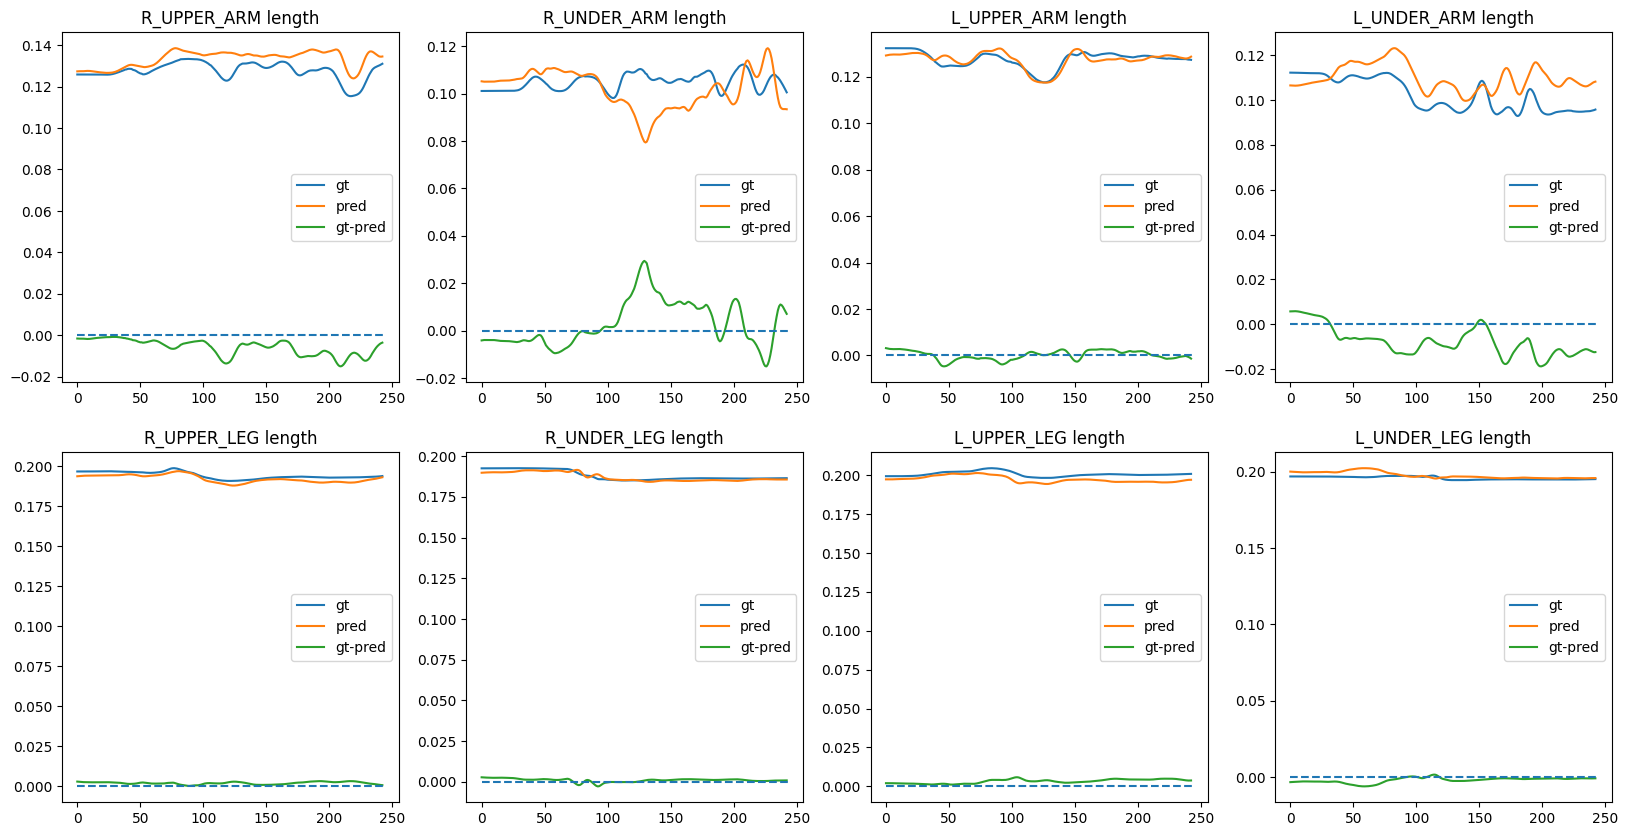

In [8]:
%matplotlib inline
fig = plt.figure(9, figsize=(20, 10))
fig.clear()
axd = fig.subplot_mosaic(
    """
    ABCD
    EFGH
    """,
    #per_subplot_kw={('A', 'B', 'C', 'D', 'E'): {'projection': '3d'}}
)

part_list = ['R_UPPER_ARM', 
             'R_LOWER_ARM', 
             'L_UPPER_ARM', 
             'L_LOWER_ARM', 
             'R_UPPER_LEG', 
             'R_LOWER_LEG', 
             'L_UPPER_LEG', 
             'L_LOWER_LEG']

for ax, part in zip(axd.values(), part_list):
    ax.plot(gt_length[:, len_ids[part]], label='gt')
    ax.plot(pred_length[:, len_ids[part]], label='pred')
    ax.plot(gt_length[:, len_ids[part]]-pred_length[:, len_ids[part]], label='gt-pred')
    ax.hlines(0, xmin=0, xmax=len(gt_length[:, len_ids[part]]) ,linestyles='--')
    ax.legend()
    ax.set_title(f'{part} length')
    
plt.show()

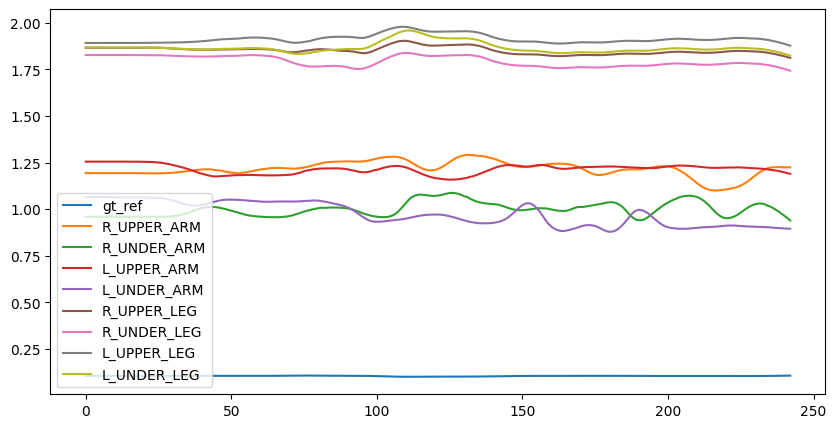

In [9]:
%matplotlib inline
fig = plt.figure(9, figsize=(10, 5))
fig.clear()
ax = fig.add_subplot(111)
ax.plot(gt_ref, label='gt_ref')
for part in part_list:
    ax.plot(gt_length[:, len_ids[part]]/gt_ref, label=part)
ax.legend()
plt.show()

### Angle

In [12]:
batch_pred_angle = get_limb_angle(results_all)
batch_gt_angle = get_limb_angle(gts_all)
batch_pred_angle.shape, batch_gt_angle.shape

(torch.Size([64, 243, 2]), torch.Size([64, 243, 2]))

In [13]:
batch_pred_r_upper_leg = batch_pred_angle[0::8]
batch_pred_l_upper_leg = batch_pred_angle[1::8]
batch_pred_r_upper_arm = batch_pred_angle[2::8]
batch_pred_l_upper_arm = batch_pred_angle[3::8]
batch_pred_r_under_leg = batch_pred_angle[4::8]
batch_pred_l_under_leg = batch_pred_angle[5::8]
batch_pred_r_under_arm = batch_pred_angle[6::8]
batch_pred_l_under_arm = batch_pred_angle[7::8]
batch_gt_r_upper_leg = batch_gt_angle[0::8]
batch_gt_l_upper_leg = batch_gt_angle[1::8]
batch_gt_r_upper_arm = batch_gt_angle[2::8]
batch_gt_l_upper_arm = batch_gt_angle[3::8]
batch_gt_r_under_leg = batch_gt_angle[4::8]
batch_gt_l_under_leg = batch_gt_angle[5::8]
batch_gt_r_under_arm = batch_gt_angle[6::8]
batch_gt_l_under_arm = batch_gt_angle[7::8]


batch_pred_r_upper_leg.shape, batch_pred_l_upper_leg.shape, batch_pred_r_upper_arm.shape, batch_pred_l_upper_arm.shape

(torch.Size([8, 243, 2]),
 torch.Size([8, 243, 2]),
 torch.Size([8, 243, 2]),
 torch.Size([8, 243, 2]))

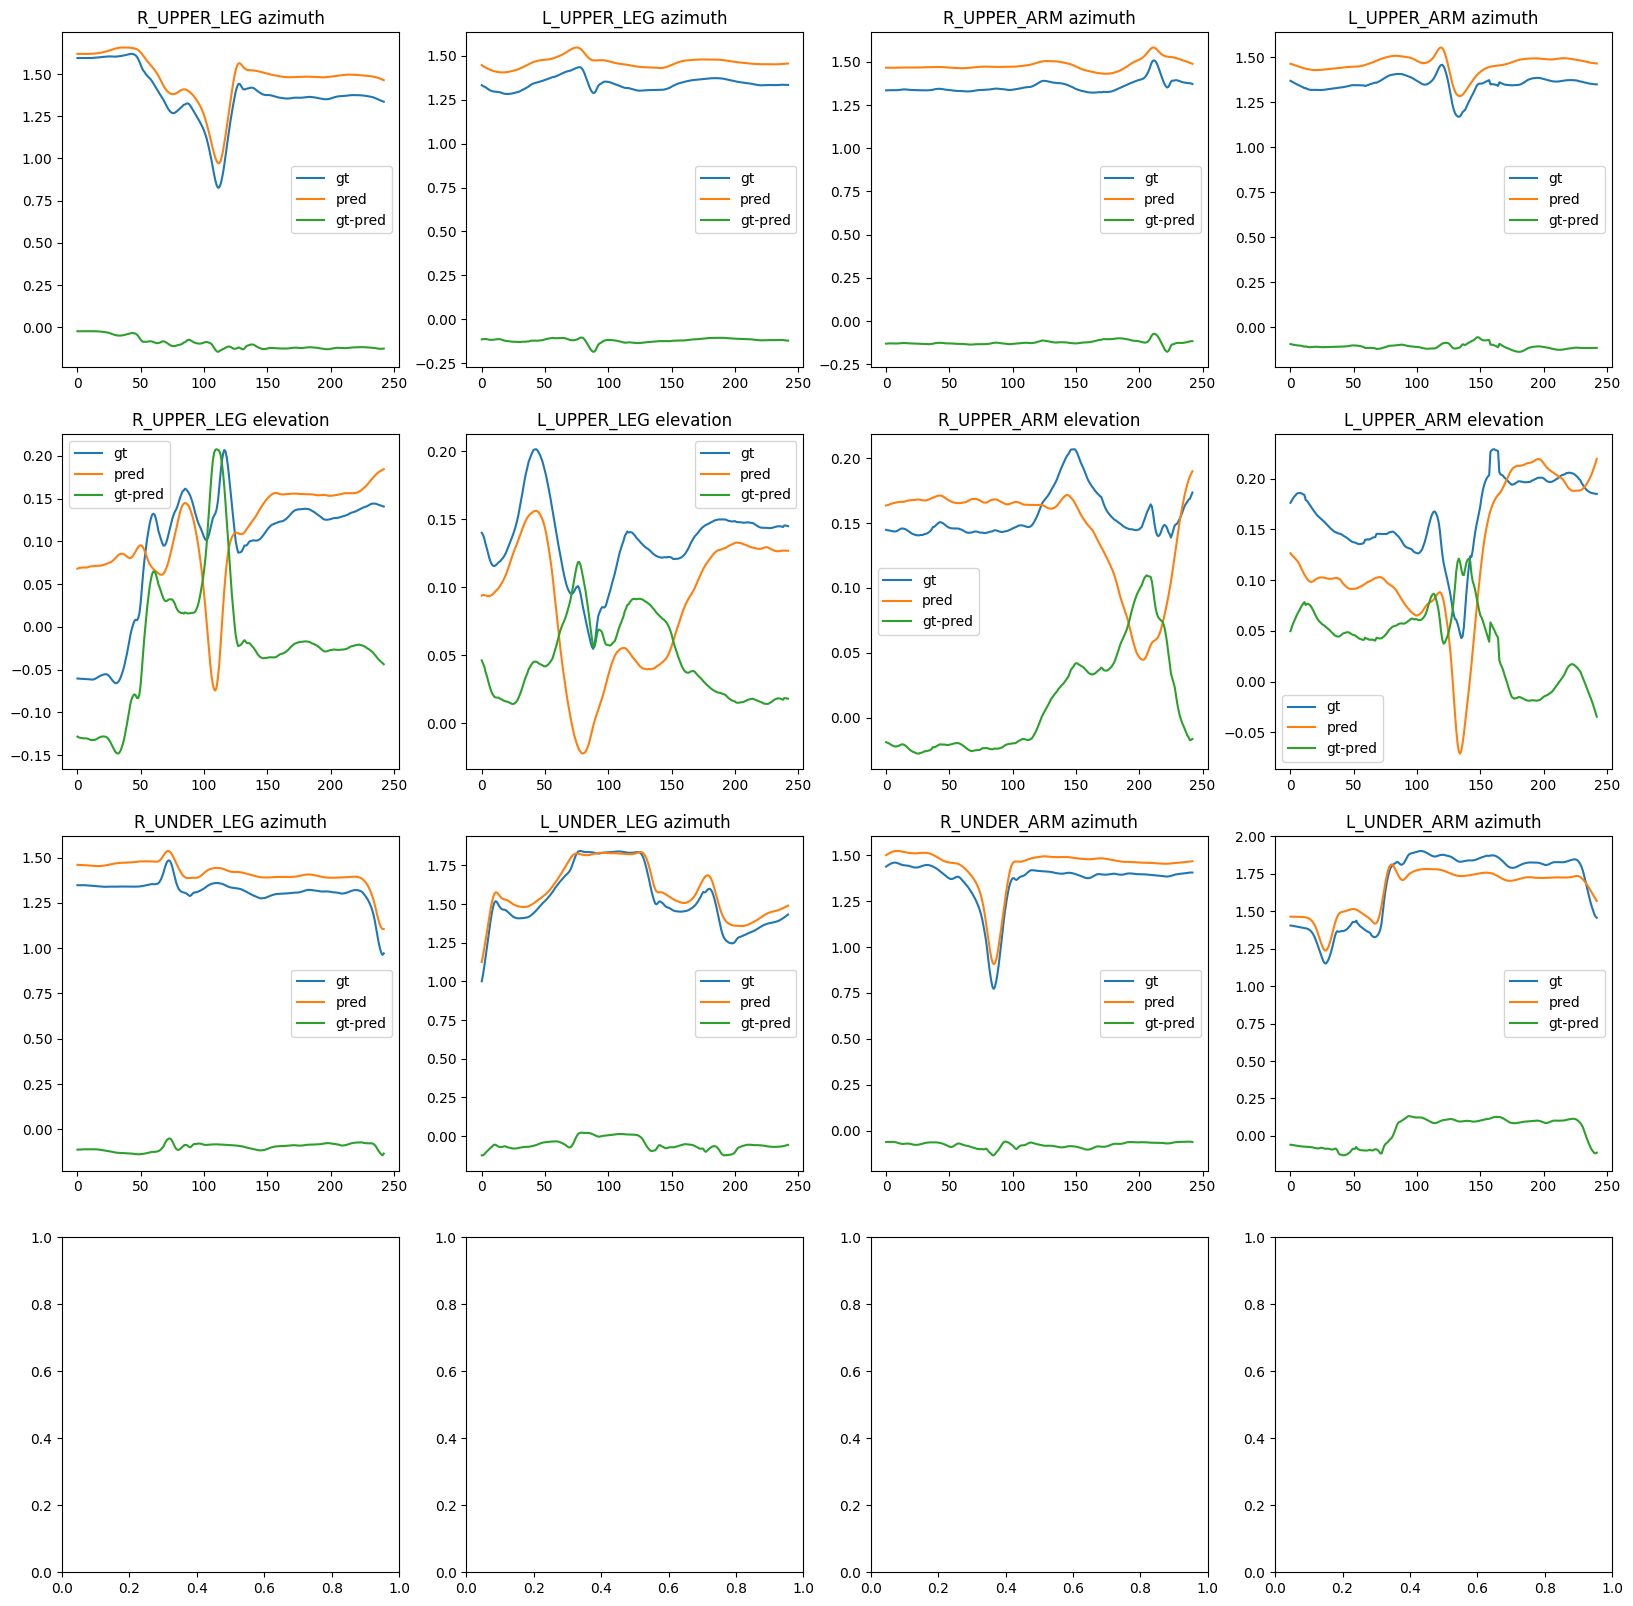

In [14]:
%matplotlib inline
fig = plt.figure(10, figsize=(20, 20))
fig.clear()
axd = fig.subplot_mosaic(
    """
    ABCD
    EFGH
    IJKL
    MNOP
    """,
    #per_subplot_kw={('A', 'B', 'C', 'D', 'E'): {'projection': '3d'}}
)

batch_num = 5

pred_r_upper_leg = batch_pred_r_upper_leg[batch_num]
pred_l_upper_leg = batch_pred_l_upper_leg[batch_num]
pred_r_upper_arm = batch_pred_r_upper_arm[batch_num]
pred_l_upper_arm = batch_pred_l_upper_arm[batch_num]
pred_r_under_leg = batch_pred_r_under_leg[batch_num]
pred_l_under_leg = batch_pred_l_under_leg[batch_num]
pred_r_under_arm = batch_pred_r_under_arm[batch_num]
pred_l_under_arm = batch_pred_l_under_arm[batch_num]

gt_r_upper_leg = batch_gt_r_upper_leg[batch_num]
gt_l_upper_leg = batch_gt_l_upper_leg[batch_num]
gt_r_upper_arm = batch_gt_r_upper_arm[batch_num]
gt_l_upper_arm = batch_gt_l_upper_arm[batch_num]
gt_r_under_leg = batch_gt_r_under_leg[batch_num]
gt_l_under_leg = batch_gt_l_under_leg[batch_num]
gt_r_under_arm = batch_gt_r_under_arm[batch_num]
gt_l_under_arm = batch_gt_l_under_arm[batch_num]


pred_r_upper_leg_azim = pred_r_upper_leg[:, 0]
pred_r_upper_leg_elev = pred_r_upper_leg[:, 1]
pred_l_upper_leg_azim = pred_l_upper_leg[:, 0]
pred_l_upper_leg_elev = pred_l_upper_leg[:, 1]
pred_r_upper_arm_azim = pred_r_upper_arm[:, 0]
pred_r_upper_arm_elev = pred_r_upper_arm[:, 1]
pred_l_upper_arm_azim = pred_l_upper_arm[:, 0]
pred_l_upper_arm_elev = pred_l_upper_arm[:, 1]
pred_r_under_leg_azim = pred_r_under_leg[:, 0]
pred_r_under_leg_elev = pred_r_under_leg[:, 1]
pred_l_under_leg_azim = pred_l_under_leg[:, 0]
pred_l_under_leg_elev = pred_l_under_leg[:, 1]
pred_r_under_arm_azim = pred_r_under_arm[:, 0]
pred_r_under_arm_elev = pred_r_under_arm[:, 1]
pred_l_under_arm_azim = pred_l_under_arm[:, 0]
pred_l_under_arm_elev = pred_l_under_arm[:, 1]
gt_r_upper_leg_azim = gt_r_upper_leg[:, 0]
gt_r_upper_leg_elev = gt_r_upper_leg[:, 1]
gt_l_upper_leg_azim = gt_l_upper_leg[:, 0]
gt_l_upper_leg_elev = gt_l_upper_leg[:, 1]
gt_r_upper_arm_azim = gt_r_upper_arm[:, 0]
gt_r_upper_arm_elev = gt_r_upper_arm[:, 1]
gt_l_upper_arm_azim = gt_l_upper_arm[:, 0]
gt_l_upper_arm_elev = gt_l_upper_arm[:, 1]
gt_r_under_leg_azim = gt_r_under_leg[:, 0]
gt_r_under_leg_elev = gt_r_under_leg[:, 1]
gt_l_under_leg_azim = gt_l_under_leg[:, 0]
gt_l_under_leg_elev = gt_l_under_leg[:, 1]
gt_r_under_arm_azim = gt_r_under_arm[:, 0]
gt_r_under_arm_elev = gt_r_under_arm[:, 1]
gt_l_under_arm_azim = gt_l_under_arm[:, 0]
gt_l_under_arm_elev = gt_l_under_arm[:, 1]

axd['A'].plot(gt_r_upper_leg_azim, label='gt')
axd['A'].plot(pred_r_upper_leg_azim, label='pred')
axd['A'].plot(gt_r_upper_leg_azim-pred_r_upper_leg_azim, label='gt-pred')
axd['A'].set_title('R_UPPER_LEG azimuth')
axd['A'].legend()

axd['B'].plot(gt_l_upper_leg_azim, label='gt')
axd['B'].plot(pred_l_upper_leg_azim, label='pred')
axd['B'].plot(gt_l_upper_leg_azim-pred_l_upper_leg_azim, label='gt-pred')
axd['B'].set_title('L_UPPER_LEG azimuth')
axd['B'].legend()

axd['C'].plot(gt_r_upper_arm_azim, label='gt')
axd['C'].plot(pred_r_upper_arm_azim, label='pred')
axd['C'].plot(gt_r_upper_arm_azim-pred_r_upper_arm_azim, label='gt-pred')
axd['C'].set_title('R_UPPER_ARM azimuth')
axd['C'].legend()

axd['D'].plot(gt_l_upper_arm_azim, label='gt')
axd['D'].plot(pred_l_upper_arm_azim, label='pred')
axd['D'].plot(gt_l_upper_arm_azim-pred_l_upper_arm_azim, label='gt-pred')
axd['D'].set_title('L_UPPER_ARM azimuth')
axd['D'].legend()

axd['E'].plot(gt_r_upper_leg_elev, label='gt')
axd['E'].plot(pred_r_upper_leg_elev, label='pred')
axd['E'].plot(gt_r_upper_leg_elev-pred_r_upper_leg_elev, label='gt-pred')
axd['E'].set_title('R_UPPER_LEG elevation')
axd['E'].legend()

axd['F'].plot(gt_l_upper_leg_elev, label='gt')
axd['F'].plot(pred_l_upper_leg_elev, label='pred')
axd['F'].plot(gt_l_upper_leg_elev-pred_l_upper_leg_elev, label='gt-pred')
axd['F'].set_title('L_UPPER_LEG elevation')
axd['F'].legend()

axd['G'].plot(gt_r_upper_arm_elev, label='gt')
axd['G'].plot(pred_r_upper_arm_elev, label='pred')
axd['G'].plot(gt_r_upper_arm_elev-pred_r_upper_arm_elev, label='gt-pred')
axd['G'].set_title('R_UPPER_ARM elevation')
axd['G'].legend()

axd['H'].plot(gt_l_upper_arm_elev, label='gt')
axd['H'].plot(pred_l_upper_arm_elev, label='pred')
axd['H'].plot(gt_l_upper_arm_elev-pred_l_upper_arm_elev, label='gt-pred')
axd['H'].set_title('L_UPPER_ARM elevation')
axd['H'].legend()

axd['I'].plot(gt_r_under_leg_azim, label='gt')
axd['I'].plot(pred_r_under_leg_azim, label='pred')
axd['I'].plot(gt_r_under_leg_azim-pred_r_under_leg_azim, label='gt-pred')
axd['I'].set_title('R_LOWER_LEG azimuth')
axd['I'].legend()

axd['J'].plot(gt_l_under_leg_azim, label='gt')
axd['J'].plot(pred_l_under_leg_azim, label='pred')
axd['J'].plot(gt_l_under_leg_azim-pred_l_under_leg_azim, label='gt-pred')
axd['J'].set_title('L_LOWER_LEG azimuth')
axd['J'].legend()

axd['K'].plot(gt_r_under_arm_azim, label='gt')
axd['K'].plot(pred_r_under_arm_azim, label='pred')
axd['K'].plot(gt_r_under_arm_azim-pred_r_under_arm_azim, label='gt-pred')
axd['K'].set_title('R_LOWER_ARM azimuth')
axd['K'].legend()

axd['L'].plot(gt_l_under_arm_azim, label='gt')
axd['L'].plot(pred_l_under_arm_azim, label='pred')
axd['L'].plot(gt_l_under_arm_azim-pred_l_under_arm_azim, label='gt-pred')
axd['L'].set_title('L_LOWER_ARM azimuth')
axd['L'].legend()

plt.show()


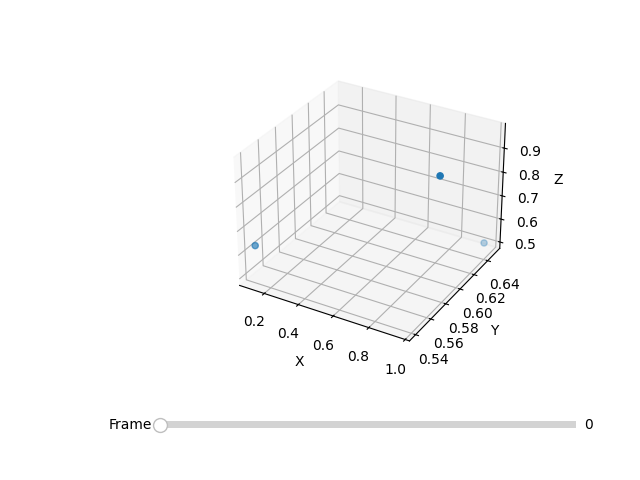

In [26]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from mpl_toolkits.mplot3d import Axes3D

# 예제 데이터: 243 프레임에 대한 임의의 3D 포즈 데이터
# 여기서는 간단한 예시로 각 포즈가 3개의 점으로 구성되어 있으며, 각 점은 (x, y, z) 좌표를 가집니다.
# 실제 데이터에 맞게 조정해주세요.
data = np.random.rand(243, 3, 3)  # (프레임 수, 점의 수, 좌표)

# 초기 프레임 설정
initial_frame = 0

# 그래프 설정
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.25, bottom=0.25)

# 슬라이더를 위한 축
axcolor = 'lightgoldenrodyellow'
axframe = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

# 슬라이더 초기화
frame_slider = Slider(ax=axframe, label='Frame', valmin=0, valmax=242, valinit=initial_frame, valfmt='%0.0f')

# 포즈를 그리는 함수
def update(val):
    frame = int(frame_slider.val)
    ax.clear()
    ax.scatter(data[frame, :, 0], data[frame, :, 1], data[frame, :, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.draw()

# 슬라이더 값이 변경될 때마다 update 함수 호출
frame_slider.on_changed(update)

# 초기 포즈 표시
update(initial_frame)

plt.show()


In [41]:
def get_limb_lens(x):
    '''
        Input: (N, T, 17, 3)
        Output: (N, T, 16)
    '''
    limbs_id = [[0,1], [1,2], [2,3],
         [0,4], [4,5], [5,6],
         [0,7], [7,8], [8,9], [9,10],
         [8,11], [11,12], [12,13],
         [8,14], [14,15], [15,16]
        ]
    limbs = x[:,limbs_id,:]
    limbs = limbs[:,:,0,:]-limbs[:,:,1,:]
    limb_lens = np.linalg.norm(limbs, axis=-1)
    return limb_lens

In [42]:
batch_num = 4
frame_num = 50
pred_3d_pos = results_all[batch_num].copy() # (243, 17, 3)
gt_3d_pos = gts_all[batch_num].copy() # (243, 17, 3)
input_2d = inputs_all[batch_num].copy()

R_HIP = 0
R_UPPER_LEG = 1
R_LOWER_LEG = 2
L_HIP = 3
L_UPPER_LEG = 4
L_LOWER_LEG = 5
L_SHOULDER = 10
L_UPPER_ARM = 11
L_LOWER_ARM = 12
R_SHOULDER = 13
R_UPPER_ARM = 14
R_LOWER_ARM = 15

gt_length = get_limb_lens(gt_3d_pos)
pred_length = get_limb_lens(pred_3d_pos)

gt_ref = gt_length[:, R_HIP] + gt_length[:, L_HIP]

In [44]:
gt_length[:, R_UPPER_ARM].shape, gt_ref.shape

((243,), (243,))

In [50]:
gt_ref

array([0.10814904, 0.10812006, 0.10808612, 0.10805023, 0.10804069,
       0.10805699, 0.10805763, 0.10809444, 0.10810456, 0.10815094,
       0.10821449, 0.10829043, 0.10837393, 0.10846544, 0.10855848,
       0.10865763, 0.10875594, 0.10883665, 0.1089206 , 0.1089927 ,
       0.10903989, 0.1090866 , 0.10911831, 0.1091461 , 0.10916591,
       0.1091785 , 0.10918318, 0.10919055, 0.10919738, 0.10920681,
       0.10921593, 0.10923073, 0.10924146, 0.10926534, 0.10929458,
       0.1093214 , 0.10934864, 0.10938586, 0.10942617, 0.10946105,
       0.10949036, 0.10950628, 0.10950334, 0.10948057, 0.10943598,
       0.1093802 , 0.10931511, 0.10924537, 0.10915741, 0.10904445,
       0.10891002, 0.10877162, 0.10862419, 0.1084578 , 0.10827684,
       0.1080902 , 0.1078789 , 0.10764036, 0.10740849, 0.10714556,
       0.10684986, 0.10653   , 0.10619593, 0.10584009, 0.10549822,
       0.1051504 , 0.10483381, 0.10455255, 0.10429019, 0.10406418,
       0.10388713, 0.10372657, 0.1035921 , 0.1034932 , 0.10344

In [53]:
(gt_length[:, R_UPPER_ARM]/gt_ref).mean(), (pred_length[:, R_UPPER_ARM]/gt_ref).mean(), (gt_length[:, R_UPPER_ARM]/gt_ref).var(), (pred_length[:, R_UPPER_ARM]/gt_ref).var()

(1.2712777, 1.3014171, 0.00017826458, 0.0007688051)

In [54]:
for part in [R_HIP, R_UPPER_LEG, R_LOWER_LEG, L_HIP, L_UPPER_LEG, L_LOWER_LEG, L_SHOULDER, L_UPPER_ARM, L_LOWER_ARM, R_SHOULDER, R_UPPER_ARM, R_LOWER_ARM]:
    print(part, (gt_length[:, part]/gt_ref).mean(), (pred_length[:, part]/gt_ref).mean(), (gt_length[:, part]/gt_ref).var(), (pred_length[:, part]/gt_ref).var())

0 0.4989675 0.587558 2.0331309e-07 0.00012877863
1 1.8951167 1.8526825 0.00057914323 0.000627452
2 1.822369 1.8070191 0.0005797067 0.0005119972
3 0.50103253 0.5931227 2.0331179e-07 0.00013086564
4 1.9738057 1.9287752 0.00057852856 0.00040517168
5 1.9042273 1.8607064 0.0010764349 0.0012501691
10 0.7205114 0.64327365 0.00033152025 0.00034255453
11 1.2667826 1.2859465 0.0012702304 0.0016766917
12 1.0642786 1.1030796 0.006734232 0.011774037
13 0.7912534 0.6765255 9.5524585e-05 0.00108953
14 1.2712777 1.3014171 0.00017826458 0.0007688051
15 0.9998885 0.9631493 0.0006436209 0.0012203816


### Data Loading (fit3D)

In [40]:
args.dt_file = 'fit3d_all_train_except_target_action.pkl'
args.subset_list = ['FIT3D_ALL_TRAIN_EXCEPT_TARGET_ACTION']
datareader = DataReaderFIT3D(n_frames=args.clip_len, sample_stride=args.sample_stride, data_stride_train=args.data_stride, data_stride_test=args.clip_len, dt_root = 'data/motion3d', dt_file=args.dt_file)
testloader_params = {
        'batch_size': args.batch_size,
        'shuffle': False,
        'num_workers': 12,
        'pin_memory': True,
        'prefetch_factor': 4,
        'persistent_workers': True
}
test_dataset = MotionDataset3D(args, args.subset_list, 'train')
test_loader = DataLoader(test_dataset, **testloader_params)

In [41]:
from train_custom import evaluate
args.canonical = False
args.mpjpe_after_part = False
args.part_list = ['whole']
args.eval_part = 'whole'

In [42]:
e1, e2, results_all, total_result_dict = evaluate(args, model_pos, test_loader, datareader)

INFO: Testing


100%|██████████| 1068/1068 [06:37<00:00,  2.69it/s]


AssertionError: 

### Data Loading (kookmin test)

In [16]:
# args.dt_file = 'kookmin_total_with_kookmin_setting2_test1_mmpose_test.pkl'
# args.subset_list = ['KOOKMIN_TOTAL_WITH_KOOKMIN_SETTING2_TEST1_MMPOSE_TEST']
# datareader = DataReaderH36M(n_frames=args.clip_len, sample_stride=args.sample_stride, data_stride_train=args.data_stride, data_stride_test=args.clip_len, dt_root = 'data/motion3d', dt_file=args.dt_file)
# testloader_params = {
#         'batch_size': args.batch_size,
#         'shuffle': False,
#         'num_workers': 12,
#         'pin_memory': True,
#         'prefetch_factor': 4,
#         'persistent_workers': True
# }
# test_dataset = MotionDataset3D(args, args.subset_list, 'test')
# test_loader = DataLoader(test_dataset, **testloader_params)

# load 2D pose from mmpose
subject = 'S15'
action = 'squat'
cam_id = '5'
W = 1080
H = 1920
target_video = f'kookmin2_{subject}_{action}_{cam_id}'
data = readJSON(f'/home/hrai/codes/mmpose/work_dirs/mmpose_result_for_action_recognition/{subject}_{action}_{cam_id}.json')

In [55]:
pose_2d_list = []
for frame_num in range(len(data['instance_info'])):
    max_score = 0
    max_idx = -1
    for i in range(len(data['instance_info'][frame_num]['instances'])):
        #print(np.mean(mmpose_result['instance_info'][frame_num]['instances'][i]['keypoint_scores']))
        if np.mean(data['instance_info'][frame_num]['instances'][i]['keypoint_scores']) > max_score:
            max_score = np.mean(data['instance_info'][frame_num]['instances'][i]['keypoint_scores'])
            max_idx = i
    keypoint = np.array(data['instance_info'][frame_num]['instances'][max_idx]['keypoints'])
    pose_2d_list.append(keypoint)
pose_2d_list = np.array(joint_2d)
pose_2d_list = np.append(pose_2d_list, np.ones((pose_2d_list.shape[0], pose_2d_list.shape[1], 1)), axis=2) # [:243]
pose_2d_list.shape

(1353, 17, 3)

In [77]:
subject_list = ['S15']
action_list = ['squat', 'burpee', 'pushup', 'yoga', 'kneeup', 'benchpress', 'cat']
cam_list = ['5']

from itertools import product
items = [subject_list, action_list, cam_list]
target_list = list(product(*items))
target_list

[('S15', 'squat', '5'),
 ('S15', 'burpee', '5'),
 ('S15', 'pushup', '5'),
 ('S15', 'yoga', '5'),
 ('S15', 'kneeup', '5'),
 ('S15', 'benchpress', '5'),
 ('S15', 'cat', '5')]

video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_squat_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_squat_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_squat_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_squat_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_squat_5_video.mp4
output_videos/kookmin2_S15_squat_5/FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_squat_5_video.mp4


100%|██████████| 1215/1215 [00:31<00:00, 38.49it/s]


video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_burpee_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_burpee_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_burpee_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_burpee_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_burpee_5_video.mp4
output_videos/kookmin2_S15_burpee_5/FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_burpee_5_video.mp4


100%|██████████| 1215/1215 [00:32<00:00, 37.62it/s]


video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_pushup_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_pushup_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_pushup_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_pushup_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_pushup_5_video.mp4
output_videos/kookmin2_S15_pushup_5/FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_pushup_5_video.mp4


100%|██████████| 1215/1215 [00:31<00:00, 38.80it/s]


video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_yoga_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_yoga_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_yoga_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_yoga_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_yoga_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_yoga_5_video.mp4
output_videos/kookmin2_S15_yoga_5/FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_yoga_5_video.mp4


100%|██████████| 1458/1458 [00:38<00:00, 38.33it/s]


video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_kneeup_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_kneeup_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_kneeup_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_kneeup_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_kneeup_5_video.mp4
output_videos/kookmin2_S15_kneeup_5/FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_kneeup_5_video.mp4


100%|██████████| 1215/1215 [00:32<00:00, 36.99it/s]


video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_benchpress_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_benchpress_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_benchpress_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_benchpress_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_benchpress_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_benchpress_5_video.mp4
output_videos/kookmin2_S15_benchpress_5/FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_benchpress_5_video.mp4


100%|██████████| 1458/1458 [00:36<00:00, 39.64it/s]


video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_cat_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_cat_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_cat_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_cat_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_cat_5_video.mp4
video_name: FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_cat_5_video.mp4
output_videos/kookmin2_S15_cat_5/FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1_kookmin2_S15_cat_5_video.mp4


100%|██████████| 1458/1458 [00:37<00:00, 38.53it/s]


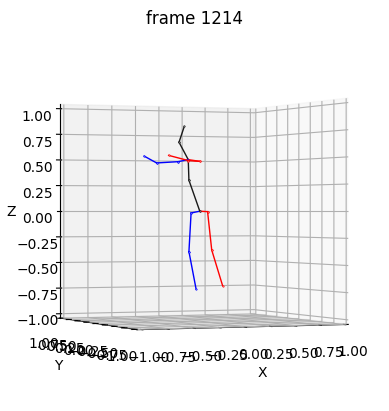

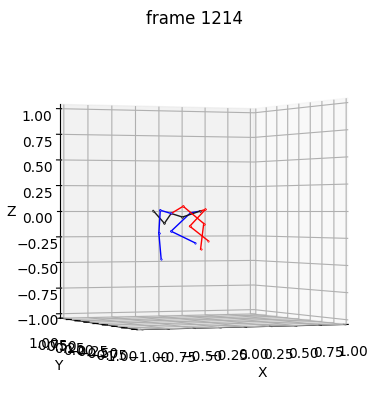

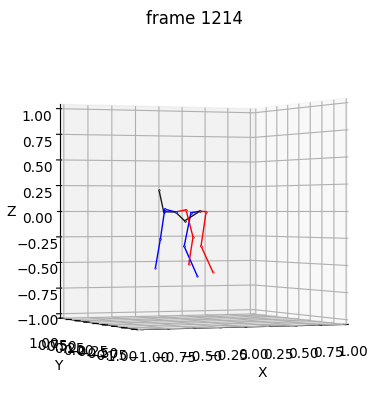

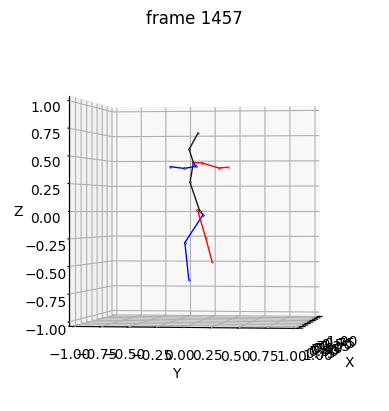

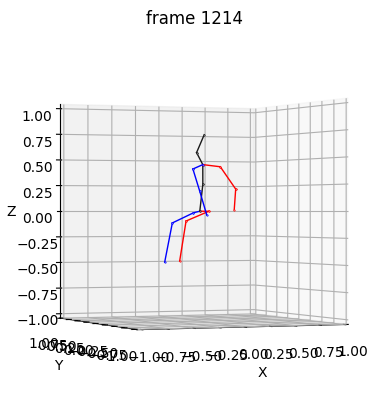

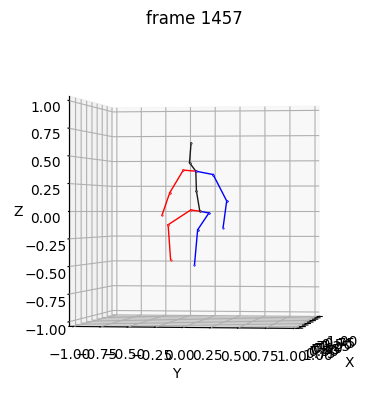

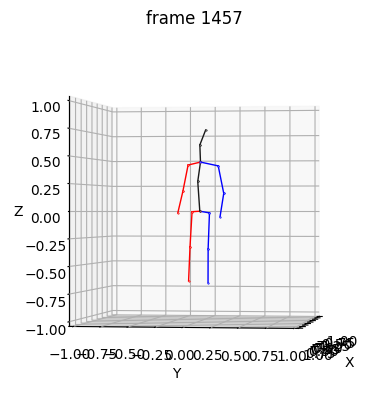

In [84]:
for target_model in ['FT_MB_ft_h36m_kookmin_total_with_kookmin_setting2_test1']:
    opts = parse_args(target=target_model)
    args = get_config(opts.config)
    #print(opts.evaluate)

    if 'DHDST2' in opts.evaluate: model_pos = DHDSTformer2(chk_filename='', args=args)
    elif 'DHDST_torso' in opts.evaluate: model_pos = DHDSTformer_torso(chk_filename='', args=args)
    elif 'DHDST_limb' in opts.evaluate: model_pos = DHDSTformer_limb(chk_filename='', args=args)
    elif 'MB' in opts.evaluate: model_pos = load_backbone(args)
        
    model_pos = nn.DataParallel(model_pos)
    model_pos = model_pos.cuda()
    checkpoint = torch.load(opts.evaluate, map_location=lambda storage, loc: storage)
    model_pos.load_state_dict(checkpoint['model_pos'], strict=True)
    model_pos = model_pos.eval()
    
    for target in target_list:
        subject, action, cam_id = target
        W = 1080
        H = 1920
        target_video = f'kookmin2_{subject}_{action}_{cam_id}'
        data = readJSON(f'/home/hrai/codes/mmpose/work_dirs/mmpose_result_for_action_recognition/{subject}_{action}_{cam_id}.json')
        #frames = get_video_frame_kookmin(subject, action, cam_id)
        
        pose_2d_list = []
        for frame_num in range(len(data['instance_info'])):
            max_score = 0
            max_idx = -1
            for i in range(len(data['instance_info'][frame_num]['instances'])):
                #print(np.mean(mmpose_result['instance_info'][frame_num]['instances'][i]['keypoint_scores']))
                if np.mean(data['instance_info'][frame_num]['instances'][i]['keypoint_scores']) > max_score:
                    max_score = np.mean(data['instance_info'][frame_num]['instances'][i]['keypoint_scores'])
                    max_idx = i
            keypoint = np.array(data['instance_info'][frame_num]['instances'][max_idx]['keypoints'])
            pose_2d_list.append(keypoint)
        pose_2d_list = np.array(pose_2d_list)
        pose_2d_list = np.append(pose_2d_list, np.ones((pose_2d_list.shape[0], pose_2d_list.shape[1], 1)), axis=2) # [:243]
        
        # inference
        if len(pose_2d_list) > 243:
            outputs = []
            input_datas = []
            for i in range(len(pose_2d_list)//243):
                start_frame = i*243
                if start_frame + 243 > len(pose_2d_list): break
                output, input_data, video_name = inference(args, 
                                                    model_pos, 
                                                    target_model, target_video,
                                                    pose_2d_list, 
                                                    W=W, H=H, 
                                                    start_frame=start_frame, clip_len=243, 
                                                    input_type='video', 
                                                    canonical_input=False, 
                                                    visualize_input=False)
                outputs.append(output)
                input_datas.append(input_data)
            output = np.concatenate(outputs, axis=0)
            input_data = torch.cat(input_datas, axis=1)  
        else:
            output, input_data, video_name = inference(args, 
                                                    model_pos, 
                                                    target_model, target_video,
                                                    pose_2d_list, 
                                                    W=W, H=H, 
                                                    start_frame=0, clip_len=243, 
                                                    input_type='video', 
                                                    canonical_input=False, 
                                                    visualize_input=False)
        
        output = get_rootrel_pose(output)
        
        # save output video
        save_mb_output_video(output, input_data, target_video, video_name, 
                            xlim=(-1,1), ylim=(-1,1), zlim=(-1, 1), grid=False, fps=60, dynamic_view=True,
                            imgs=frames, on_ground=False, refine_tilt=False, pose_type='3d')
    

### Data Loading (random limb)

In [5]:
args.dt_file = 'random_limb_train1600_test400.pkl'
args.subset_list = ['RANDOM_LIMB_TRAIN1600_TEST400']
datareader = DataReaderRandomLimb(n_frames=args.clip_len, sample_stride=args.sample_stride, data_stride_train=args.data_stride, data_stride_test=args.clip_len, dt_root = 'data/motion3d', dt_file=args.dt_file)
testloader_params = {
        'batch_size': args.batch_size,
        'shuffle': False,
        'num_workers': 12,
        'pin_memory': True,
        'prefetch_factor': 4,
        'persistent_workers': True
}
test_dataset = MotionDataset3D(args, args.subset_list, 'test')
test_loader = DataLoader(test_dataset, **testloader_params)


In [8]:
loss = 0
with torch.no_grad():
    for batch_input, batch_gt in tqdm(test_loader):
        if torch.cuda.is_available():
            batch_input = batch_input.cuda()
            batch_gt = batch_gt.cuda()
        batch_output = model_pos(batch_input)
        # if 'DHDST2' in opts.evaluate:
        #     batch_output = model_pos(batch_input)
        # elif 'DHDST_torso' in opts.evaluate:
        #     batch_torso_output, batch_lower_frame_R, batch_upper_frame_R  = model_pos(batch_input)
        # elif 'DHDSTformer_limb' in opts.evaluate:
        #     batch_output = model_pos(batch_input, batch_gt_torso)
        # elif 'MB' in opts.evaluate:
        #     batch_output = model_pos(batch_input)
        break

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]


(3, 3)
(3, 3)


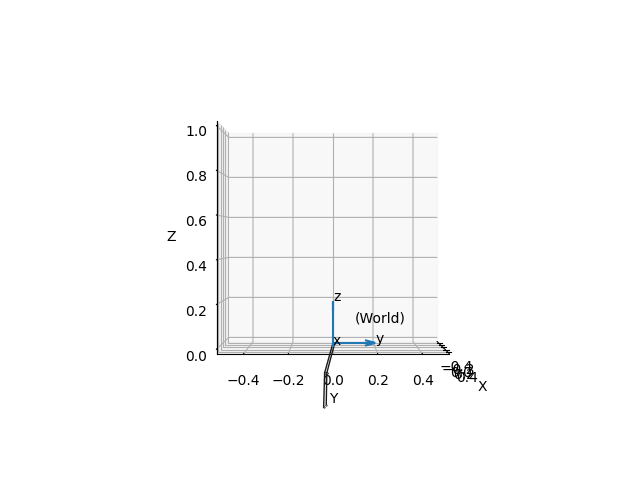

In [22]:
# check output (1 frame)
batch_num = 10
frame_num = 179

gt_pose = batch_gt[batch_num, frame_num].cpu().numpy()
pred_pose = batch_output[batch_num, frame_num].cpu().numpy()

def postprocessing(pose):
    #pose = get_rootrel_pose(output[0].copy()) # 1 frame
    print(pose.shape)
    R1 = Rotation.from_rotvec([-np.pi/2, 0, 0]).as_matrix() # -90 around x-axis
    R2 = Rotation.from_rotvec([0, 0, np.pi/2]).as_matrix() # 90 around z-axis
    pose = rotate_torso_by_R(pose, R2 @ R1)
    return pose

gt_pose = postprocessing(gt_pose)
pred_pose = postprocessing(pred_pose)
gt_pose_hat = gt_pose - gt_pose[0]

fig = plt.figure(5)
fig.clear()
ax = axes_3d(fig, xlim=(-0.5, 0.5), ylim=(-0.5, 0.5), zlim=(0, 1))
#draw_3d_pose(ax, gt_pose, dataset='limb')
draw_3d_pose(ax, gt_pose_hat, dataset='limb')
draw_3d_pose(ax, pred_pose, dataset='limb')
generate_world_frame().draw3d(scale=0.2, head_length=0.05)
plt.show()

### Results for kookmin squat (대각선 방향)

### Compare limb length result

In [ ]:
# _, split_id_test = datareader.get_split_id()
# actions = np.array(datareader.dt_dataset['test']['action']) # 103130 ['squat' ...  'kneeup']
# factors = np.array(datareader.dt_dataset['test']['2.5d_factor']) # 103130 [3.49990559 ... 2.09230852]
# gts = np.array(datareader.dt_dataset['test']['joints_2.5d_image']) # 103130, 17, 3
# sources = np.array(datareader.dt_dataset['test']['source']) # 103130 ['S02_6_squat_001' ... 'S08_4_kneeup_001']

# num_test_frames = len(actions)
# frames = np.array(range(num_test_frames))
# action_clips = np.array([actions[split_id_test[i]] for i in range(len(split_id_test))]) # actions[split_id_test]
# factor_clips = np.array([factors[split_id_test[i]] for i in range(len(split_id_test))]) # factors[split_id_test]
# source_clips = np.array([sources[split_id_test[i]] for i in range(len(split_id_test))]) # sources[split_id_test]
# frame_clips  = np.array([frames[split_id_test[i]] for i in range(len(split_id_test))]) # frames[split_id_test]
# gt_clips     = np.array([gts[split_id_test[i]] for i in range(len(split_id_test))]) # gts[split_id_test]

In [13]:
# split_id_test[idx], action_clips[idx], factor_clips[idx], source_clips[idx], frame_clips[idx], gt_clips[idx].shape

In [21]:
# for frame in range(0, len(gt_clips[idx]), 50):
#     print(factor_clips[idx][frame])
#     pose_3d_pred = results_all[idx][frame] * 3.7#factor_clips[idx][frame]
#     pose_3d_gt = gt_clips[idx][frame]
#     pose_3d_pred -= pose_3d_pred[0]
#     pose_3d_gt -= pose_3d_gt[0]
#     fig = plt.figure(0)
#     fig.clear()
#     ax = axes_3d(fig)
#     draw_3d_pose(ax, pose_3d_pred/1000.0)
#     draw_3d_pose(ax, pose_3d_gt/1000.0)
#     #plt.show()
#     plt.savefig('test{}.png'.format(frame))
#     #break
    

3.499905586242676
3.5017988681793213
3.500577449798584
3.495361566543579
3.4970390796661377


In [16]:
h36m_connections = [
    (0,1),   # pelvis - r_hip
    (0,4),   # pelvis - l_hip
    (0,7),   # pelvis - torso
    (1,2),   # r_hip - r_knee
    (2,3),   # r_knee - r_ankle
    (4,5),   # l_hip - l_knee
    (5,6),   # l_knee - l_ankle
    (7,8),   # torso - neck
    (8,9),   # neck - nose
    (9,10),  # nose - headtop
    (8,14),  # neck - r_shoulder
    (14,15), # r_shoulder - r_elbow
    (15,16), # r_elbow - r_wrist
    (8,11),  # neck - l_shoulder
    (11,12), # l_shoulder - l_elbow
    (12,13)  # l_elbow - l_wrist
]

def get_link_length(pose_3d, connections):
    # pelvis, r_hip, l_hip, torso, neck, l_shoulder, r_shoulder = 0, 1, 4, 7, 8, 11, 14
    # r_knee, r_ankle, l_knee, l_ankle = 2, 3, 5, 6
    # l_elbow, l_wrist, r_elbow, r_wrist = 12, 13, 15, 16
    link_length = []
    for connection in connections:
        link_length.append(np.linalg.norm(pose_3d[connection[0]] - pose_3d[connection[1]]))
    return np.array(link_length)

In [17]:
pred_length = get_link_length(pose_3d_pred/1000.0, h36m_connections)
gt_length = get_link_length(pose_3d_gt/1000.0, h36m_connections)
length_error = abs(pred_length - gt_length)
length_error

array([0.00151713, 0.00091767, 0.00902751, 0.00368509, 0.0105386 ,
       0.00772105, 0.00898564, 0.00418692, 0.00352909, 0.0039919 ,
       0.00549086, 0.00596831, 0.00891203, 0.00368655, 0.00549003,
       0.00898395])

In [18]:
length_error[11], length_error[12], length_error[14], length_error[15]

(0.005968314041597089,
 0.008912034118529921,
 0.005490033523852411,
 0.008983945570708363)

In [19]:
print('pelvis - r_hip '      , length_error[0])
print('pelvis - l_hip '      , length_error[1])
print('pelvis - torso '      , length_error[2])
print('r_hip - r_knee '      , length_error[3])
print('r_knee - r_ankle '    , length_error[4])
print('l_hip - l_knee '      , length_error[5])
print('l_knee - l_ankle '    , length_error[6])
print('torso - neck '        , length_error[7])
print('neck - nose '         , length_error[8])
print('nose - headtop '      , length_error[9])
print('neck - r_shoulder '   , length_error[10])
print('r_shoulder - r_elbow ', length_error[11])
print('r_elbow - r_wrist '   , length_error[12])
print('neck - l_shoulder '   , length_error[13])
print('l_shoulder - l_elbow ', length_error[14])
print('l_elbow - l_wrist '   , length_error[15])

pelvis - r_hip  0.0015171253286587888
pelvis - l_hip  0.0009176691975954915
pelvis - torso  0.009027514946196968
r_hip - r_knee  0.003685085087576201
r_knee - r_ankle  0.010538599036833796
l_hip - l_knee  0.007721046316983782
l_knee - l_ankle  0.00898563922610851
torso - neck  0.004186921202962324
neck - nose  0.0035290896721586196
nose - headtop  0.003991901696320882
neck - r_shoulder  0.005490856398907756
r_shoulder - r_elbow  0.005968314041597089
r_elbow - r_wrist  0.008912034118529921
neck - l_shoulder  0.0036865529627456983
l_shoulder - l_elbow  0.005490033523852411
l_elbow - l_wrist  0.008983945570708363


In [126]:
np.linalg.norm(pose_3d_pred - pose_3d_gt, axis=1)

array([  0.        ,   0.54780174,   8.5182328 ,  24.26664485,
         2.13372334,   7.7515586 ,  18.62067092,  13.36413424,
        12.90177693,  21.32981271,  22.10233935,  13.77372539,
        56.95500214, 103.25992455,  26.47536456,  90.22016789,
        95.31798023])